In [220]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] =[10,5]

In [221]:
# ndvi_train_raw = pd.read_csv('crop_data_landsat_cloud_filter_ndvi-rvi_43Columns_2021-11-01_2022-05-30.csv')
# rvi_train_raw = pd.read_csv('crop_data_landsat_cloud_filter_ndvi-rvi_43Columns_2021-11-01_2022-05-30.csv')
# ndvi_test_raw = pd.read_csv('submission_landsat_cloud_filter_ndvi_43Columns_2021-11-01_2022-05-30.csv')
# rvi_test_raw = pd.read_csv('submission_vh_vv_data_rvi_45Columns_2021-12-01_2022-08-30.csv')

In [222]:
ndvi_train_raw = pd.read_csv('crop_data_landsat_cloud_filter_ndvi-rvi_43Columns_2021-11-01_2022-05-30.csv')
rvi_train_raw = pd.read_csv('crop_data_senti1_rvi_45Columns_2021-12-01_2022-08-30.csv',index_col = 0)
ndvi_test_raw = pd.read_csv('submission_landsat_cloud_filter_ndvi_43Columns_2021-11-01_2022-05-30.csv')
rvi_test_raw = pd.read_csv('submission_vh_vv_data_rvi_45Columns_2021-12-01_2022-08-30.csv',index_col = 0)

In [223]:
ndvi_train_raw.shape,rvi_train_raw.shape,ndvi_test_raw.shape,rvi_test_raw.shape

((600, 45), (600, 47), (250, 43), (250, 45))

In [224]:
ndvi_train_raw.head(2)

Latitude and Longitude Class of Land     ndvi1     ndvi2  \
0   (10.323727047081501, 105.2516346045924)          Rice  0.686632  0.610402   
1  (10.322364360592521, 105.27843410554115)          Rice  0.659306  0.580200   

      ndvi3     ndvi4     ndvi5     ndvi6     ndvi7     ndvi8  ...     rvi34  \
0  0.534172  0.457942  0.381712  0.305482  0.229253  0.233093  ...  0.313382   
1  0.501093  0.421987  0.342880  0.263774  0.184667  0.203444  ...  0.282769   

      rvi35     rvi36     rvi37     rvi38     rvi39     rvi40     rvi41  \
0  0.424991  0.536599  0.540242  0.543885  0.699072  0.699072  0.699072   
1  0.422064  0.554025  0.621165  0.688304  0.677295  0.677295  0.677295   

      rvi42     rvi43  
0  0.699072  0.699072  
1  0.677295  0.677295  

[2 rows x 45 columns]

In [225]:
ndvi_test_raw.head(2)

ndvi1     ndvi2     ndvi3     ndvi4     ndvi5     ndvi6     ndvi7  \
0  0.034391  0.049119  0.063847  0.078574  0.093302  0.108030  0.122758   
1  0.389868  0.380155  0.370443  0.300873  0.231303  0.161734  0.372257   

      ndvi8     ndvi9    ndvi10  ...    ndvi34    ndvi35    ndvi36    ndvi37  \
0  0.137486  0.280228  0.401420  ...  0.664195  0.552815  0.754318  0.754318   
1  0.582780  0.805053  0.820882  ...  0.746475  0.746475  0.746475  0.746475   

     ndvi38    ndvi39    ndvi40    ndvi41    ndvi42    ndvi43  
0  0.754318  0.754318  0.754318  0.754318  0.754318  0.754318  
1  0.746475  0.746475  0.746475  0.746475  0.746475  0.746475  

[2 rows x 43 columns]

In [226]:
rvi_train_raw.head(2)

Latitude and Longitude Class of Land      rvi1      rvi2  \
0   (10.323727047081501, 105.2516346045924)          Rice  1.111368  0.617824   
1  (10.322364360592521, 105.27843410554115)          Rice  0.654609  0.787948   

       rvi3      rvi4      rvi5      rvi6      rvi7      rvi8  ...     rvi36  \
0  0.698573  0.394425  0.674144  0.316586  0.466150  0.582673  ...  0.589837   
1  0.687906  0.354302  0.465752  0.769894  0.456114  0.268524  ...  0.951499   

      rvi37     rvi38     rvi39     rvi40     rvi41     rvi42     rvi43  \
0  0.993113  0.602891  0.552731  0.603144  0.655350  0.432936  0.471715   
1  0.921718  0.932209  0.592974  0.850943  0.484364  0.528684  0.908461   

      rvi44     rvi45  
0  0.236284  0.290553  
1  0.188856  0.087447  

[2 rows x 47 columns]

In [227]:
rvi_test_raw.head(2)

rvi1      rvi2      rvi3      rvi4      rvi5      rvi6      rvi7  \
0  1.265666  1.040062  0.953330  0.481993  0.419678  0.333645  0.319963   
1  0.884043  0.690166  1.170694  0.689360  0.637310  0.308467  0.289741   

       rvi8      rvi9     rvi10  ...     rvi36     rvi37     rvi38     rvi39  \
0  0.260668  0.197258  0.239706  ...  0.785152  0.734679  0.858956  0.932741   
1  1.135938  0.410704  0.626633  ...  0.866087  0.723487  0.857754  0.888209   

      rvi40     rvi41     rvi42     rvi43     rvi44     rvi45  
0  0.718733  0.388959  0.352628  0.342057  0.365078  0.493889  
1  0.928014  0.479017  0.459849  0.537319  0.709433  0.724080  

[2 rows x 45 columns]

In [228]:
def extract_features(df,column = 'ndvi',istrain = True):
    '''
        Returns time series dataframe
        Add time series features like diff
    
    
    ''' 
#     print('istrain',istrain)
#     print('before',df.shape)
    if istrain==False:
        columns_o = list(df.columns)
#         print(columns_o)
        df['Latitude and Longitude'] = np.arange(df.shape[0])
        df['Class of Land'] =  np.arange(df.shape[0])
        cols1 = ['Latitude and Longitude', 'Class of Land'] + list(columns_o)
#         print(cols1)
        df = df[cols1]
#     print('after',df.shape)
    
    features = []
    features.append(column)
    ncols = df.shape[1]
    cols = ['Latitude and Longitude', 'Class of Land']+[i for i in range(ncols-2)]
    df.columns = cols
    
    df_fn = df.melt(id_vars=['Latitude and Longitude', 'Class of Land'], 
        var_name="timestep", 
        value_name=column) \
    .sort_values(['Latitude and Longitude', 'Class of Land',"timestep" ]) \
    .reset_index(drop = True)
    # df_return = df_return.drop(['Class of Land','timestep'], axis = 1 ).set_index('Latitude and Longitude')
    
    # adding time series features
    
    df_fn[f'{column}_diff'] = df_fn.groupby('Latitude and Longitude')[column].diff()
    features.append(f'{column}_diff')
    
    df_return = pd.DataFrame()
    for column in features:
        df_return[f'{column}_mean'] = df_fn.groupby('Latitude and Longitude')[column].mean()
        df_return[f'{column}_var'] = df_fn.groupby('Latitude and Longitude')[column].var()
        df_return[f'{column}_min'] = df_fn.groupby('Latitude and Longitude')[column].min()
        df_return[f'{column}_max'] = df_fn.groupby('Latitude and Longitude')[column].max()

    if istrain==True:
        y = df.groupby('Latitude and Longitude')['Class of Land'].last()
        
        return df_return, y,df_fn
    else:
        df_return.index = range(250)
        return df_return,df_fn,df
    
ndvi_train,ndvi_y,train_ts = extract_features(ndvi_train_raw,column = 'ndvi',istrain = True)
rvi_train,rvi_y,test_ts = extract_features(rvi_train_raw,column = 'rvi',istrain = True)

ndvi_test,ndvi_test_ts,df = extract_features(ndvi_test_raw,column = 'ndvi',istrain = False)
rvi_test,rvi_test_ts,df2 = extract_features(rvi_test_raw,column = 'rvi',istrain = False)


In [229]:
train_ts.shape,test_ts.shape

((25800, 5), (27000, 5))

In [230]:
rvi_test_ts

Latitude and Longitude  Class of Land timestep       rvi  rvi_diff
0                           0              0        0  1.265666       NaN
1                           0              0        1  1.040062 -0.225603
2                           0              0        2  0.953330 -0.086732
3                           0              0        3  0.481993 -0.471337
4                           0              0        4  0.419678 -0.062315
...                       ...            ...      ...       ...       ...
11245                     249            249       40  0.944659  0.059910
11246                     249            249       41  0.900042 -0.044617
11247                     249            249       42  0.806164 -0.093878
11248                     249            249       43  0.123226 -0.682938
11249                     249            249       44  0.378794  0.255568

[11250 rows x 5 columns]

In [231]:
df2 

Latitude and Longitude  Class of Land         0         1         2  \
0                         0              0  1.265666  1.040062  0.953330   
1                         1              1  0.884043  0.690166  1.170694   
2                         2              2  0.451890  0.459892  0.542179   
3                         3              3  0.600245  0.841846  0.862757   
4                         4              4  0.334199  0.483108  0.270834   
..                      ...            ...       ...       ...       ...   
245                     245            245  0.765299  0.166487  0.895504   
246                     246            246  0.974963  0.723215  0.821368   
247                     247            247  0.823814  0.737651  0.938715   
248                     248            248  0.343348  0.588906  0.297077   
249                     249            249  0.721062  0.822658  1.033150   

            3         4         5         6         7  ...        35  \
0    0.481993  0.419678  0.333645  0.319963  0.260668  ...  0.785152   
1    0.689360  0.637310  0.308467  0.289741  1.135938  ...  0.866087   
2    0.284459  0.342210  0.546757  0.196962  0.168028  ...  0.754909   
3    0.778806  0.827842  0.744846  0.939001  0.984508  ...  0.856625   
4    0.142687  0.196492  0.162851  0.366315  0.379547  ...  0.989964   
..        ...       ...       ...       ...       ...  ...       ...   
245  0.705222  1.068917  0.911787  1.065881  1.241181  ...  0.808078   
246  1.004466  0.827873  0.865453  0.730184  1.281953  ...  0.607271   
247  0.868397  1.111644  0.956707  0.886674  0.856495  ...  0.875399   
248  0.376723  0.223008  0.925028  0.106045  0.100033  ...  0.932673   
249  0.998451  0.690695  0.456173  0.854449  0.616866  ...  1.114390   

           36        37        38        39        40        41        42  \
0    0.734679  0.858956  0.932741  0.718733  0.388959  0.352628  0.342057   
1    0.723487  0.857754  0.888209  0.928014  0.479017  0.459849  0.537319   
2    0.965200  0.867237  0.533282  0.676945  0.820860  0.804863  0.380770   
3    0.747937  0.868692  0.688991  1.114499  0.725051  0.726753  0.569186   
4    1.018154  0.491679  0.337446  0.550406  0.467019  0.596292  0.345243   
..        ...       ...       ...       ...       ...       ...       ...   
245  0.844113  0.743168  0.625059  0.711184  0.204624  0.395307  0.906744   
246  0.600885  0.768282  0.558680  0.748454  0.875459  0.862963  0.446972   
247  0.858843  1.122410  0.627327  1.105056  0.790315  0.910814  1.024471   
248  1.117945  1.017262  1.058690  0.685688  0.850116  0.685514  0.423530   
249  1.063560  0.756172  0.771486  0.884749  0.944659  0.900042  0.806164   

           43        44  
0    0.365078  0.493889  
1    0.709433  0.724080  
2    0.710452  0.808880  
3    0.480176  1.128619  
4    0.651412  0.531299  
..        ...       ...  
245  0.892950  1.165937  
246  0.654477  0.795940  
247  0.590748  0.869474  
248  0.451587  0.282715  
249  0.123226  0.378794  

[250 rows x 47 columns]

In [232]:
df2

Latitude and Longitude  Class of Land         0         1         2  \
0                         0              0  1.265666  1.040062  0.953330   
1                         1              1  0.884043  0.690166  1.170694   
2                         2              2  0.451890  0.459892  0.542179   
3                         3              3  0.600245  0.841846  0.862757   
4                         4              4  0.334199  0.483108  0.270834   
..                      ...            ...       ...       ...       ...   
245                     245            245  0.765299  0.166487  0.895504   
246                     246            246  0.974963  0.723215  0.821368   
247                     247            247  0.823814  0.737651  0.938715   
248                     248            248  0.343348  0.588906  0.297077   
249                     249            249  0.721062  0.822658  1.033150   

            3         4         5         6         7  ...        35  \
0    0.481993  0.419678  0.333645  0.319963  0.260668  ...  0.785152   
1    0.689360  0.637310  0.308467  0.289741  1.135938  ...  0.866087   
2    0.284459  0.342210  0.546757  0.196962  0.168028  ...  0.754909   
3    0.778806  0.827842  0.744846  0.939001  0.984508  ...  0.856625   
4    0.142687  0.196492  0.162851  0.366315  0.379547  ...  0.989964   
..        ...       ...       ...       ...       ...  ...       ...   
245  0.705222  1.068917  0.911787  1.065881  1.241181  ...  0.808078   
246  1.004466  0.827873  0.865453  0.730184  1.281953  ...  0.607271   
247  0.868397  1.111644  0.956707  0.886674  0.856495  ...  0.875399   
248  0.376723  0.223008  0.925028  0.106045  0.100033  ...  0.932673   
249  0.998451  0.690695  0.456173  0.854449  0.616866  ...  1.114390   

           36        37        38        39        40        41        42  \
0    0.734679  0.858956  0.932741  0.718733  0.388959  0.352628  0.342057   
1    0.723487  0.857754  0.888209  0.928014  0.479017  0.459849  0.537319   
2    0.965200  0.867237  0.533282  0.676945  0.820860  0.804863  0.380770   
3    0.747937  0.868692  0.688991  1.114499  0.725051  0.726753  0.569186   
4    1.018154  0.491679  0.337446  0.550406  0.467019  0.596292  0.345243   
..        ...       ...       ...       ...       ...       ...       ...   
245  0.844113  0.743168  0.625059  0.711184  0.204624  0.395307  0.906744   
246  0.600885  0.768282  0.558680  0.748454  0.875459  0.862963  0.446972   
247  0.858843  1.122410  0.627327  1.105056  0.790315  0.910814  1.024471   
248  1.117945  1.017262  1.058690  0.685688  0.850116  0.685514  0.423530   
249  1.063560  0.756172  0.771486  0.884749  0.944659  0.900042  0.806164   

           43        44  
0    0.365078  0.493889  
1    0.709433  0.724080  
2    0.710452  0.808880  
3    0.480176  1.128619  
4    0.651412  0.531299  
..        ...       ...  
245  0.892950  1.165937  
246  0.654477  0.795940  
247  0.590748  0.869474  
248  0.451587  0.282715  
249  0.123226  0.378794  

[250 rows x 47 columns]

In [233]:
test_ts

Latitude and Longitude Class of Land timestep  \
0      (10.001224578022901, 105.50464006270187)          Rice        0   
1      (10.001224578022901, 105.50464006270187)          Rice        1   
2      (10.001224578022901, 105.50464006270187)          Rice        2   
3      (10.001224578022901, 105.50464006270187)          Rice        3   
4      (10.001224578022901, 105.50464006270187)          Rice        4   
...                                         ...           ...      ...   
26995   (9.999861891533921, 105.50645697802042)          Rice       40   
26996   (9.999861891533921, 105.50645697802042)          Rice       41   
26997   (9.999861891533921, 105.50645697802042)          Rice       42   
26998   (9.999861891533921, 105.50645697802042)          Rice       43   
26999   (9.999861891533921, 105.50645697802042)          Rice       44   

            rvi  rvi_diff  
0      0.109703       NaN  
1      0.124558  0.014856  
2      0.381395  0.256837  
3      0.610244  0.228849  
4      0.564060 -0.046185  
...         ...       ...  
26995  0.877546  0.457132  
26996  0.674213 -0.203333  
26997  0.505906 -0.168307  
26998  0.636952  0.131046  
26999  0.808443  0.171492  

[27000 rows x 5 columns]

In [234]:
train = pd.merge(ndvi_train,rvi_train,left_index = True,right_index = True)
test = pd.merge(ndvi_test,rvi_test,left_index = True,right_index = True)

In [235]:
train.head()

ndvi_mean  ndvi_var  ndvi_min  \
Latitude and Longitude                                                    
(10.001224578022901, 105.50464006270187)   0.708813  0.010478  0.214791   
(10.007583781638141, 105.67270472966868)   0.615860  0.005020  0.562055   
(10.007583781638141, 105.6731589584983)    0.635387  0.003142  0.594482   
(10.008038010467802, 105.67225050083903)   0.618814  0.005068  0.564789   
(10.008038010467802, 105.67270472966868)   0.600186  0.007560  0.533142   

                                          ndvi_max  ndvi_diff_mean  \
Latitude and Longitude                                               
(10.001224578022901, 105.50464006270187)  0.823540        0.012220   
(10.007583781638141, 105.67270472966868)  0.759498       -0.002678   
(10.007583781638141, 105.6731589584983)   0.760343       -0.001956   
(10.008038010467802, 105.67225050083903)  0.764400       -0.002601   
(10.008038010467802, 105.67270472966868)  0.765797       -0.003399   

                                          ndvi_diff_var  ndvi_diff_min  \
Latitude and Longitude                                                   
(10.001224578022901, 105.50464006270187)       0.002484      -0.076554   
(10.007583781638141, 105.67270472966868)       0.000488      -0.080048   
(10.007583781638141, 105.6731589584983)        0.000400      -0.063847   
(10.008038010467802, 105.67225050083903)       0.000494      -0.078293   
(10.008038010467802, 105.67270472966868)       0.000641      -0.108962   

                                          ndvi_diff_max  rvi_mean   rvi_var  \
Latitude and Longitude                                                        
(10.001224578022901, 105.50464006270187)       0.161797  0.661732  0.096665   
(10.007583781638141, 105.67270472966868)       0.028357  0.745227  0.017470   
(10.007583781638141, 105.6731589584983)        0.031681  0.780731  0.023624   
(10.008038010467802, 105.67225050083903)       0.035455  0.744832  0.020925   
(10.008038010467802, 105.67270472966868)       0.032391  0.669559  0.016008   

                                           rvi_min   rvi_max  rvi_diff_mean  \
Latitude and Longitude                                                        
(10.001224578022901, 105.50464006270187)  0.109041  1.206993       0.017617   
(10.007583781638141, 105.67270472966868)  0.379240  1.016979      -0.002546   
(10.007583781638141, 105.6731589584983)   0.402049  1.108907       0.003932   
(10.008038010467802, 105.67225050083903)  0.445776  1.092764      -0.002373   
(10.008038010467802, 105.67270472966868)  0.474600  1.048633       0.004525   

                                          rvi_diff_var  rvi_diff_min  \
Latitude and Longitude                                                 
(10.001224578022901, 105.50464006270187)      0.052191     -0.494301   
(10.007583781638141, 105.67270472966868)      0.034108     -0.380259   
(10.007583781638141, 105.6731589584983)       0.045502     -0.504393   
(10.008038010467802, 105.67225050083903)      0.056311     -0.485785   
(10.008038010467802, 105.67270472966868)      0.027194     -0.383271   

                                          rvi_diff_max  
Latitude and Longitude                                  
(10.001224578022901, 105.50464006270187)      0.443820  
(10.007583781638141, 105.67270472966868)      0.334366  
(10.007583781638141, 105.6731589584983)       0.368244  
(10.008038010467802, 105.67225050083903)      0.646988  
(10.008038010467802, 105.67270472966868)      0.291452

In [236]:
train_with_y = pd.merge(train,rvi_y.map({'Rice':1,"Non Rice":0}),left_index = True,right_index = True)

<Axes: >

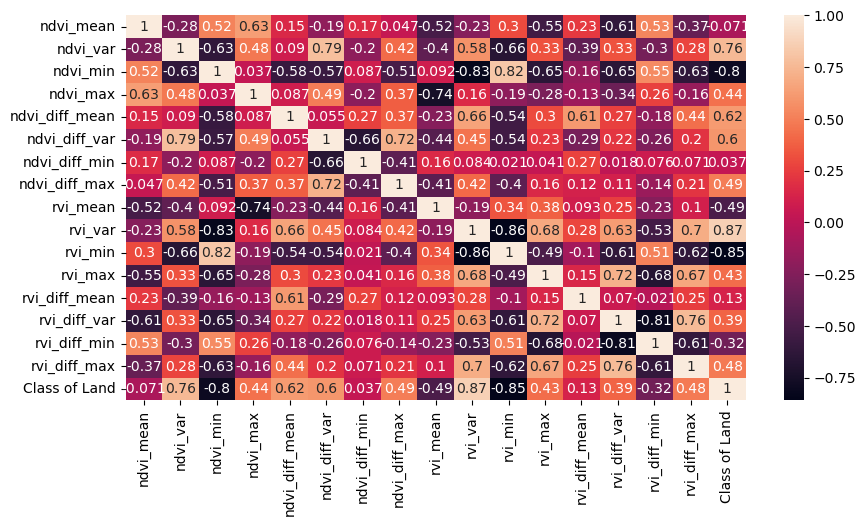

In [237]:
sns.heatmap(train_with_y.corr(),annot = True)

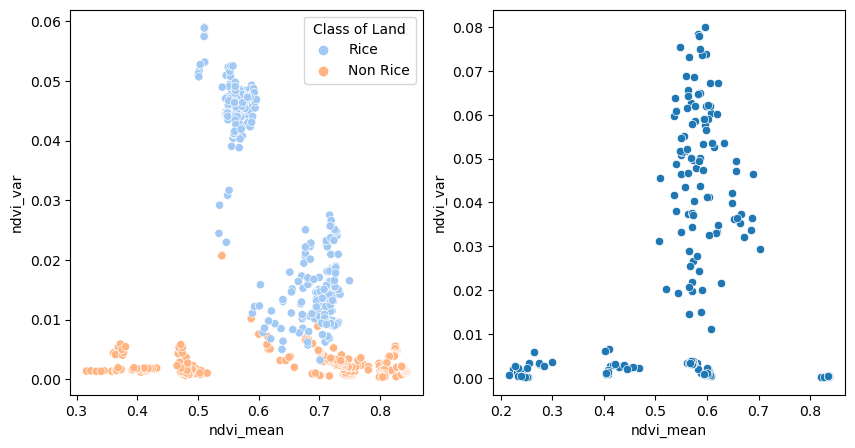

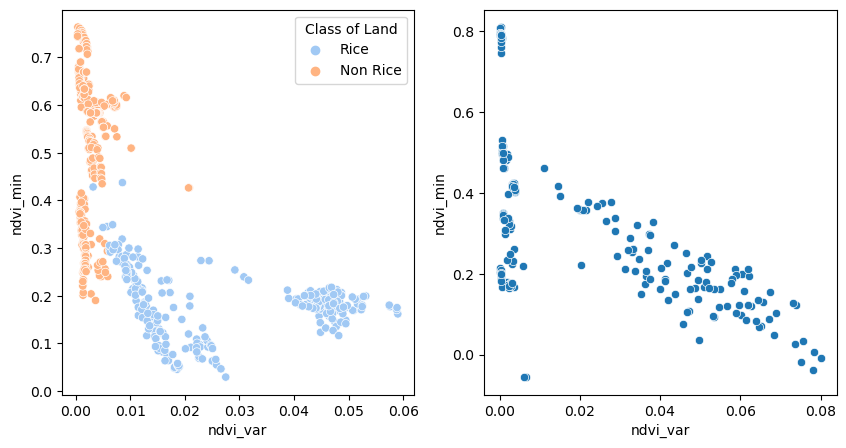

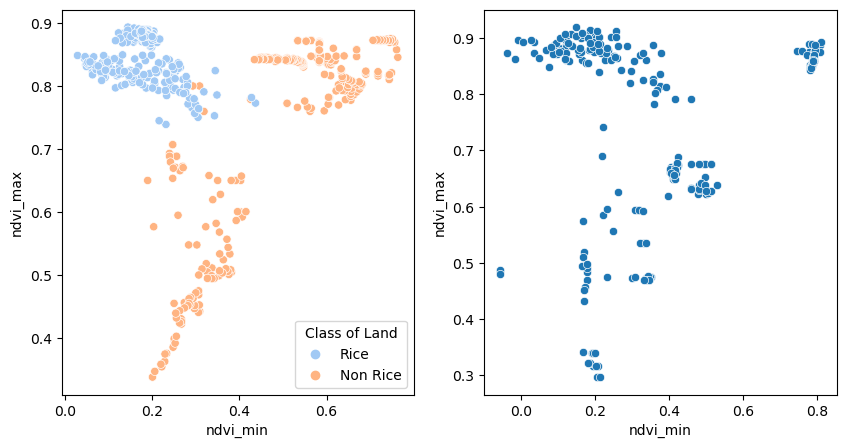

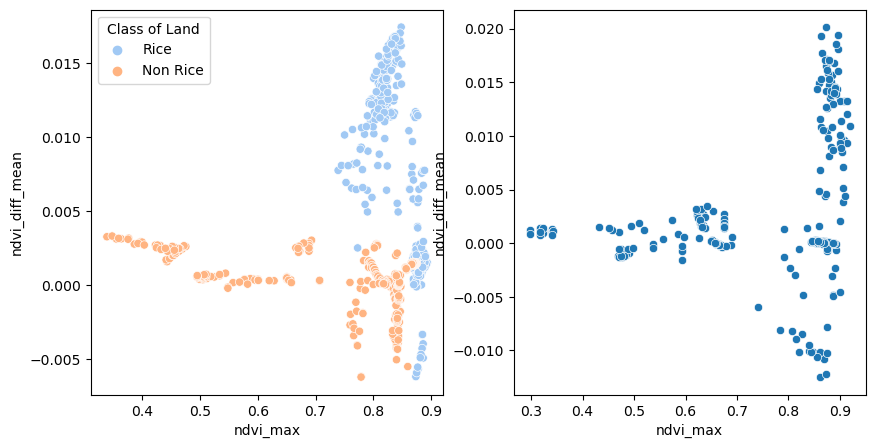

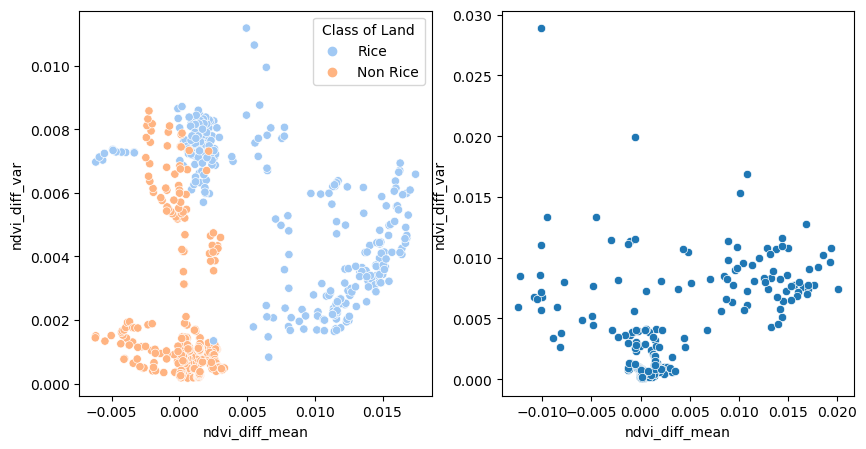

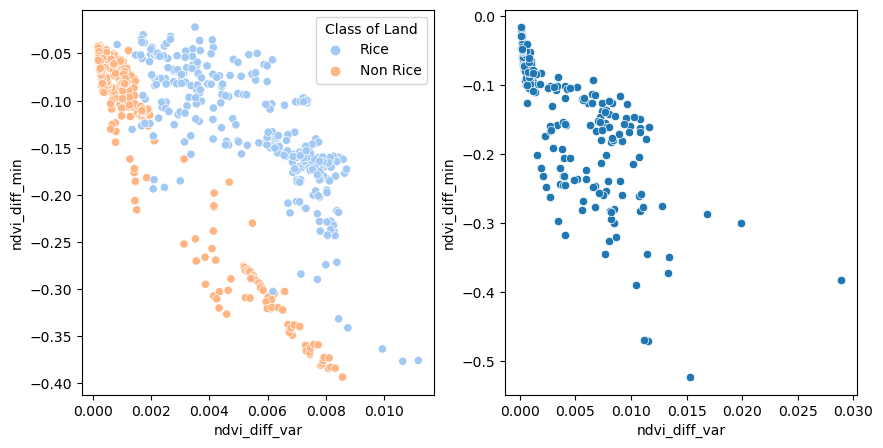

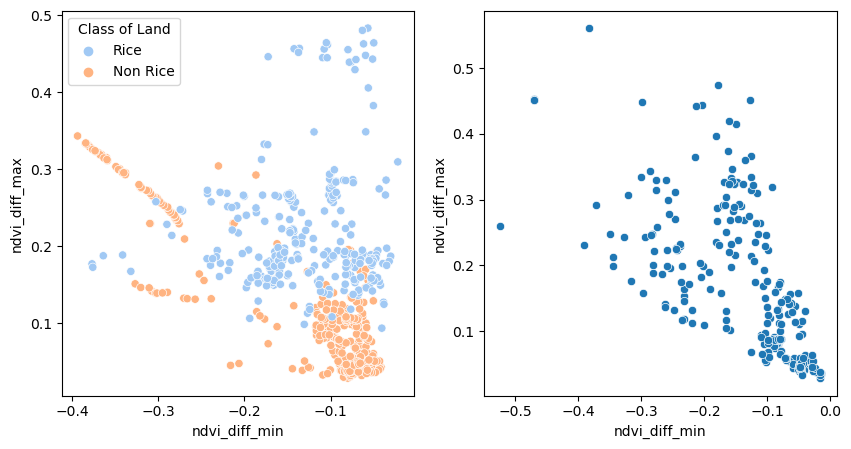

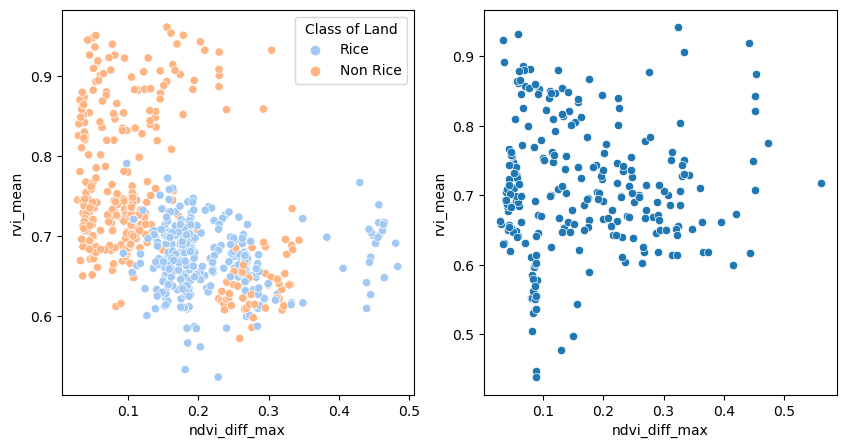

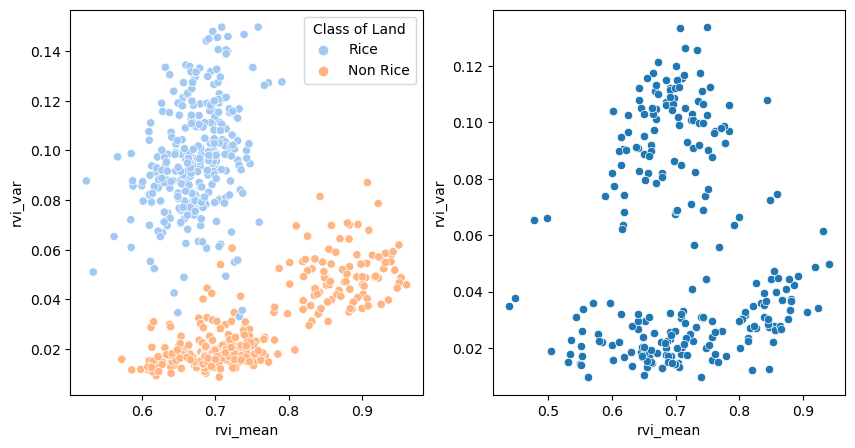

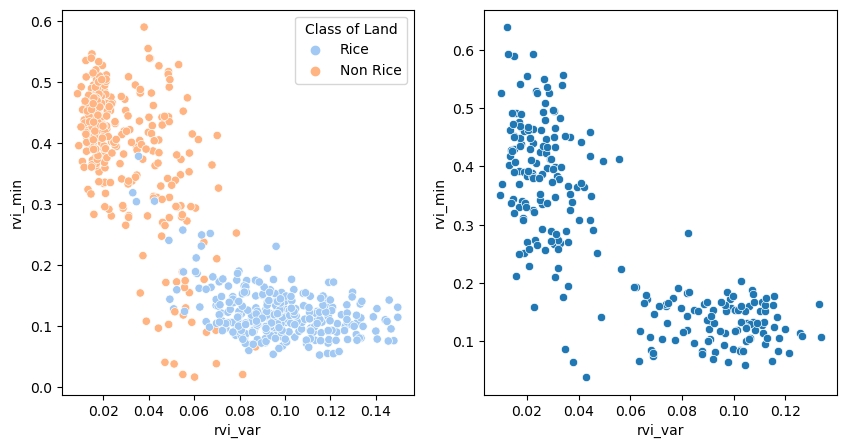

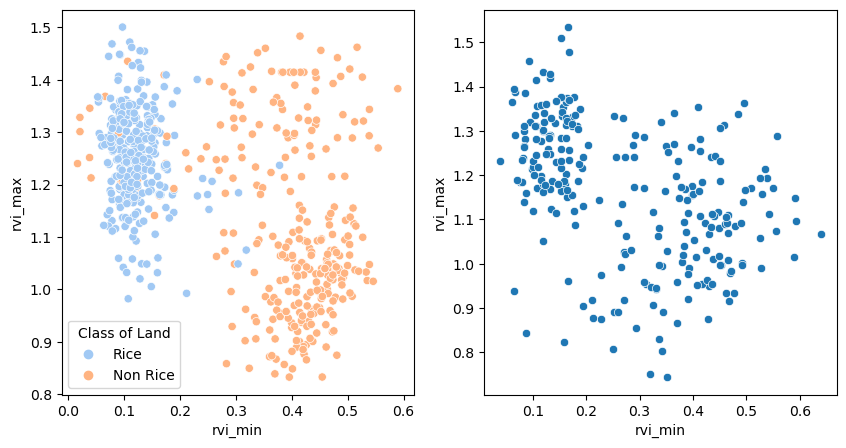

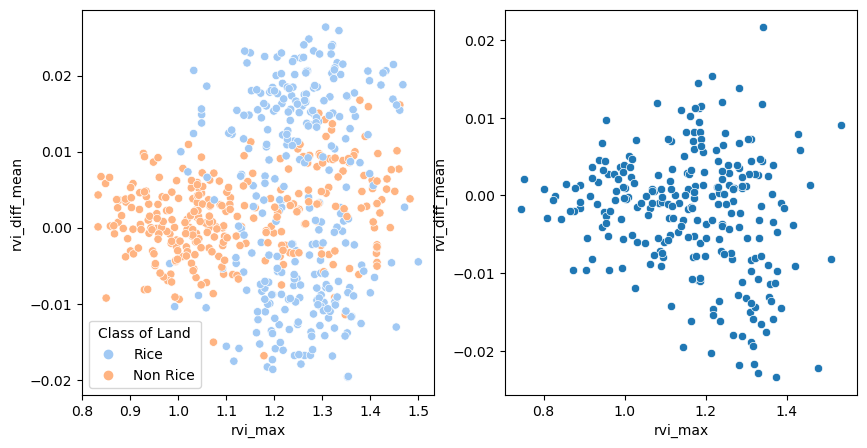

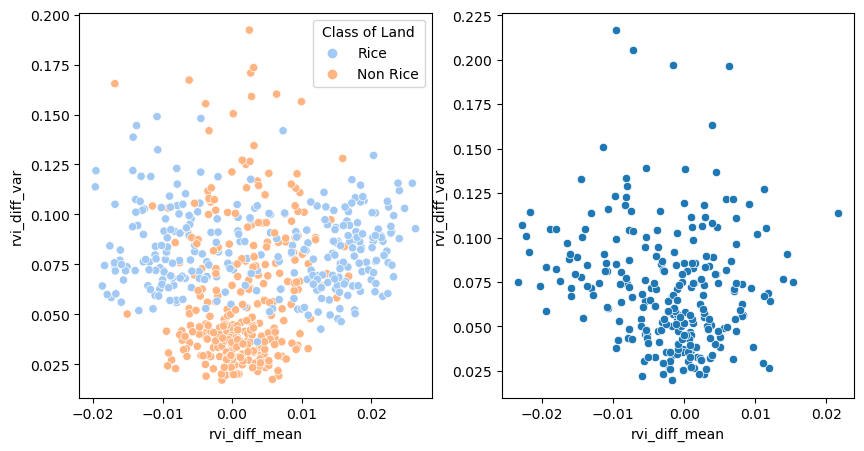

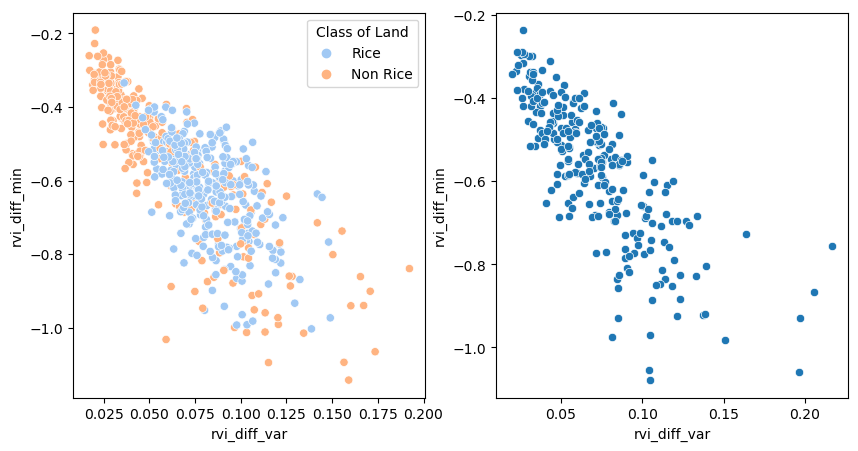

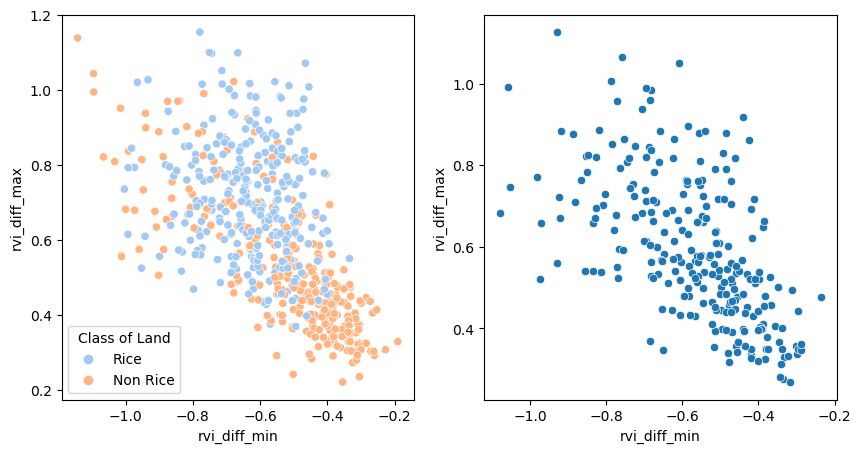

In [238]:
"""
plt.rcParams['figure.figsize'] =[10,5]
cols = train.columns
for i in range(len(cols)-1):
    fig,axes = plt.subplots(nrows = 1,ncols = 2)
    sns.scatterplot(x=cols[i], y=cols[i+1], data=train, hue=rvi_y, palette='pastel',ax=axes[0]);
    sns.scatterplot(x=cols[i], y=cols[i+1], data=test, palette='pastel',ax = axes[1]);
    
"""

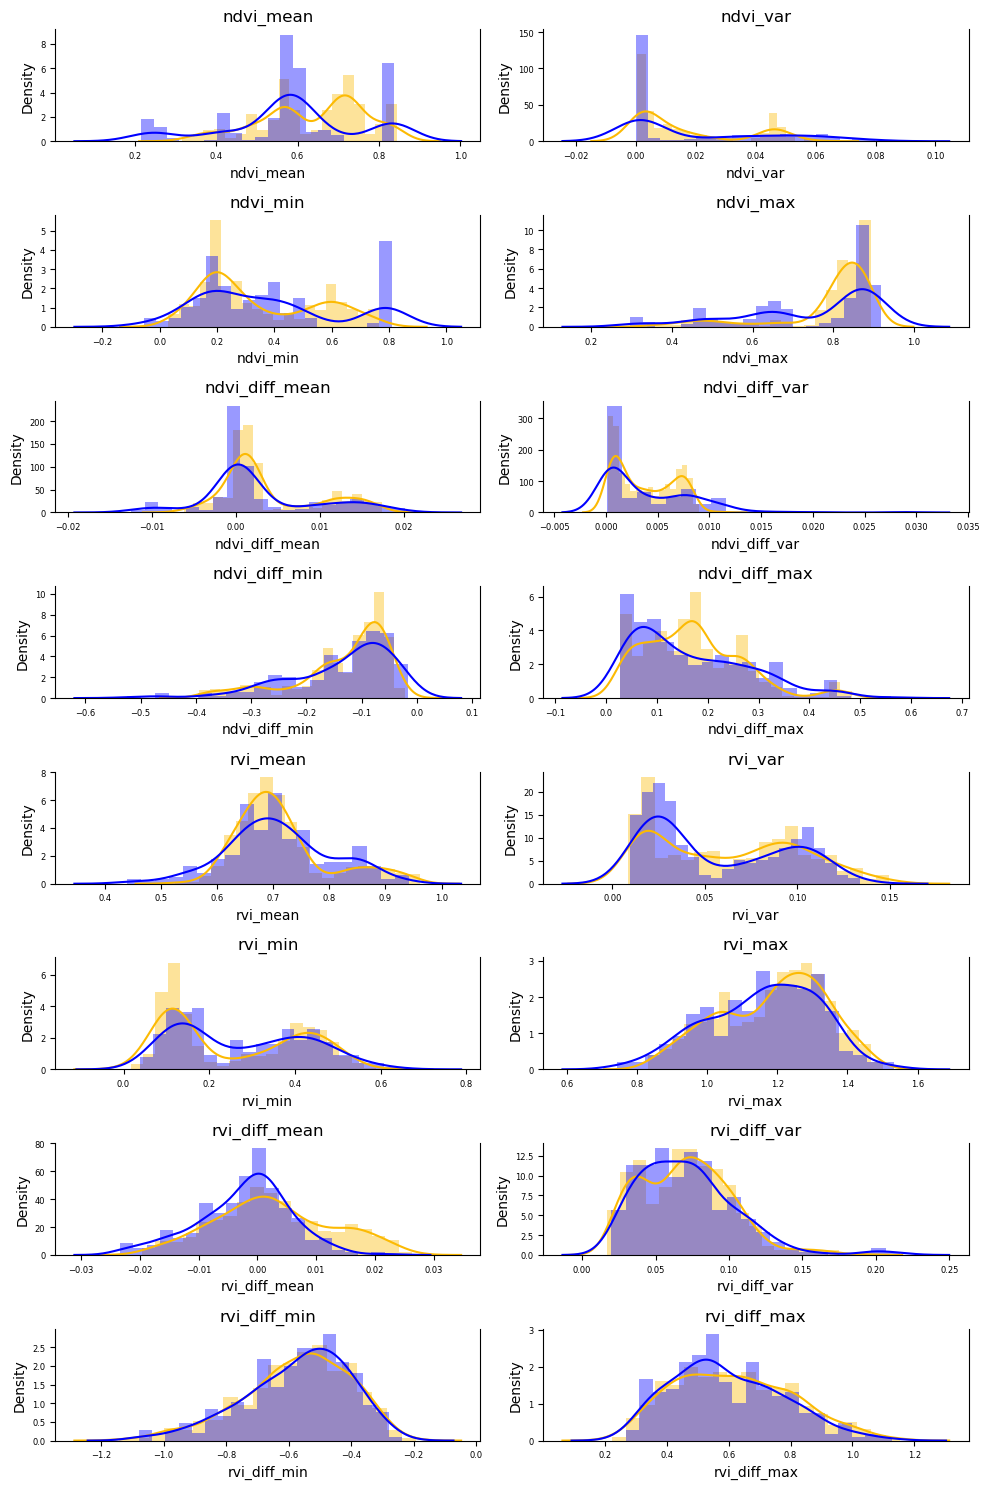

In [256]:
plt.rcParams['figure.figsize'] =[10,15]
cols = train.columns
fig,axes = plt.subplots(nrows =len(cols)//2, ncols= 2)
fig.figsize = [10,7.5]
axes = axes.flatten()
for i in range(len(cols)):
    sns.distplot(train[cols[i]],bins =20,hist = True,kde = True,color = "#fcba03",ax = axes[i])
    sns.distplot(test[cols[i]],bins =20,hist = True,kde = True,color = "b",ax = axes[i])
    axes[i].set_title(cols[i])
    axes[i].spines["top"].set_alpha(0)
    axes[i].tick_params(labelsize = 6)
#     plt.title(f"{cols[i]}")
#     plt.xlabel(f"{cols[i]}")
#     plt.ylabel("Frequency")
#     plt.show()
plt.tight_layout()

In [240]:
from scipy.stats import ks_2samp
import numpy as np

'''
    Under the null hypothesis the two distributions are identical. 
    If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%),
    then we cannot reject the hypothesis that the distributions of the two samples are the same. 
    Conversely, we can reject the null hypothesis if the p-value is low.
'''
np.random.seed(123456)
good_dist = []
statistics = []
pvalue = []
for i in range(len(cols)):
    ks_result = ks_2samp(train[cols[i]], test[cols[i]])
    p = ks_result[1]
    print(cols[i])
    print(ks_result)
    
    statistics.append(ks_result[0])
    pvalue.append(ks_result[1])
    
    if p>0.05:
        good_dist.append((cols[i],p))

ndvi_mean
KstestResult(statistic=0.30333333333333334, pvalue=7.668589272386705e-15, statistic_location=0.6668416663865326, statistic_sign=-1)
ndvi_var
KstestResult(statistic=0.267, pvalue=1.4605224278178605e-11, statistic_location=0.0010280230564616384, statistic_sign=-1)
ndvi_min
KstestResult(statistic=0.19266666666666668, pvalue=3.3240479533813877e-06, statistic_location=0.7559882666213883, statistic_sign=1)
ndvi_max
KstestResult(statistic=0.24766666666666667, pvalue=5.38103013956769e-10, statistic_location=0.6880339670320746, statistic_sign=-1)
ndvi_diff_mean
KstestResult(statistic=0.30233333333333334, pvalue=9.570317168554316e-15, statistic_location=0.0002004958842626039, statistic_sign=-1)
ndvi_diff_var
KstestResult(statistic=0.21233333333333335, pvalue=1.8974734480611518e-07, statistic_location=0.000917158981462551, statistic_sign=-1)
ndvi_diff_min
KstestResult(statistic=0.14033333333333334, pvalue=0.0017088618545357448, statistic_location=-0.050239297845127484, statistic_sign=1)

In [243]:
drop_cols = pd.DataFrame(data = {'cols':cols,'statistics':statistics,'pvalue':pvalue},).sort_values('pvalue').reset_index(drop = True)
drop_cols

cols  statistics        pvalue
0        ndvi_mean    0.303333  7.668589e-15
1   ndvi_diff_mean    0.302333  9.570317e-15
2         ndvi_var    0.267000  1.460522e-11
3         ndvi_max    0.247667  5.381030e-10
4    rvi_diff_mean    0.231000  9.613693e-09
5    ndvi_diff_var    0.212333  1.897473e-07
6         ndvi_min    0.192667  3.324048e-06
7          rvi_min    0.178667  2.146315e-05
8    ndvi_diff_max    0.165667  1.067182e-04
9          rvi_var    0.152333  4.867260e-04
10   ndvi_diff_min    0.140333  1.708862e-03
11         rvi_max    0.111000  2.380719e-02
12        rvi_mean    0.096333  7.054499e-02
13    rvi_diff_max    0.090333  1.052543e-01
14    rvi_diff_var    0.057667  5.787289e-01
15    rvi_diff_min    0.042667  8.901633e-01

In [265]:
drop_cols.cols[0]

'ndvi_mean'

In [244]:
train.columns

Index(['ndvi_mean', 'ndvi_var', 'ndvi_min', 'ndvi_max', 'ndvi_diff_mean',
       'ndvi_diff_var', 'ndvi_diff_min', 'ndvi_diff_max', 'rvi_mean',
       'rvi_var', 'rvi_min', 'rvi_max', 'rvi_diff_mean', 'rvi_diff_var',
       'rvi_diff_min', 'rvi_diff_max'],
      dtype='object')

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = train.drop(['rvi_mean','rvi_var'],axis = 1)

# X = X[cols]
cols = [ 'ndvi_var', 'ndvi_min', 'ndvi_diff_mean',
        'ndvi_diff_min', 'ndvi_diff_max',
        'rvi_diff_mean', 'rvi_diff_var',
       ]

X = train[cols].copy() 
X_test = test[cols].copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data.sort_values(by = 'VIF',ascending=False).reset_index(drop = True))
print('\n\n')

          feature       VIF
0   ndvi_diff_max  8.293282
1   ndvi_diff_min  5.326098
2    rvi_diff_var  5.114278
3        ndvi_var  4.237301
4  ndvi_diff_mean  3.735086
5        ndvi_min  2.683856
6   rvi_diff_mean  2.646458





In [271]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # X = train.drop(['rvi_mean','rvi_var'],axis = 1)

# # X = X[cols]
# cols = ['ndvi_mean', 'ndvi_var', 'ndvi_min', 'ndvi_max', 'ndvi_diff_mean',
#        'ndvi_diff_var', 'ndvi_diff_min', 'ndvi_diff_max', 'rvi_mean',
#        'rvi_var', 'rvi_min', 'rvi_max', 'rvi_diff_mean', 'rvi_diff_var',
#        'rvi_diff_min', 'rvi_diff_max']


# # cols = train.columns

# # 'ndvi_mean',  - small KS test pvalue VIF>10
# # 'rvi_var',   small KS test pvalue and VIF >10
# l = len(cols)

# for i in range(l):
#     if i > 0:
#         print(drop_cols.cols[i-1])
#         if drop_cols.cols[i-1] =='rvi_diff_var':
#             break
#         cols.remove(drop_cols.cols[i-1])
#     X = train[cols].copy() 
#     X_test = test[cols].copy()
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X.columns

#     # calculating VIF for each feature
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                               for i in range(len(X.columns))]

#     print(vif_data.sort_values(by = 'VIF',ascending=False))
#     print('\n\n')

           feature         VIF
3         ndvi_max  460.136878
0        ndvi_mean  396.663568
11         rvi_max  287.874517
8         rvi_mean  184.494256
5    ndvi_diff_var   81.257743
2         ndvi_min   66.781929
14    rvi_diff_min   39.487467
9          rvi_var   37.477309
15    rvi_diff_max   37.359382
13    rvi_diff_var   36.376263
1         ndvi_var   30.812356
10         rvi_min   27.763187
6    ndvi_diff_min   26.999092
7    ndvi_diff_max   16.673937
4   ndvi_diff_mean   10.300429
12   rvi_diff_mean    3.174352



ndvi_mean
           feature         VIF
10         rvi_max  287.389832
7         rvi_mean  177.889618
2         ndvi_max  160.799622
4    ndvi_diff_var   72.894748
1         ndvi_min   50.976042
13    rvi_diff_min   39.482911
14    rvi_diff_max   37.349295
8          rvi_var   37.333172
12    rvi_diff_var   36.183678
9          rvi_min   26.074302
0         ndvi_var   22.234830
5    ndvi_diff_min   20.710306
6    ndvi_diff_max   16.663649
3   ndvi_diff_mean    7.51

In [258]:
# cols = ['ndvi_diff_var', 'rvi_mean',
#        'rvi_var', 'rvi_diff_mean', 'rvi_diff_var']

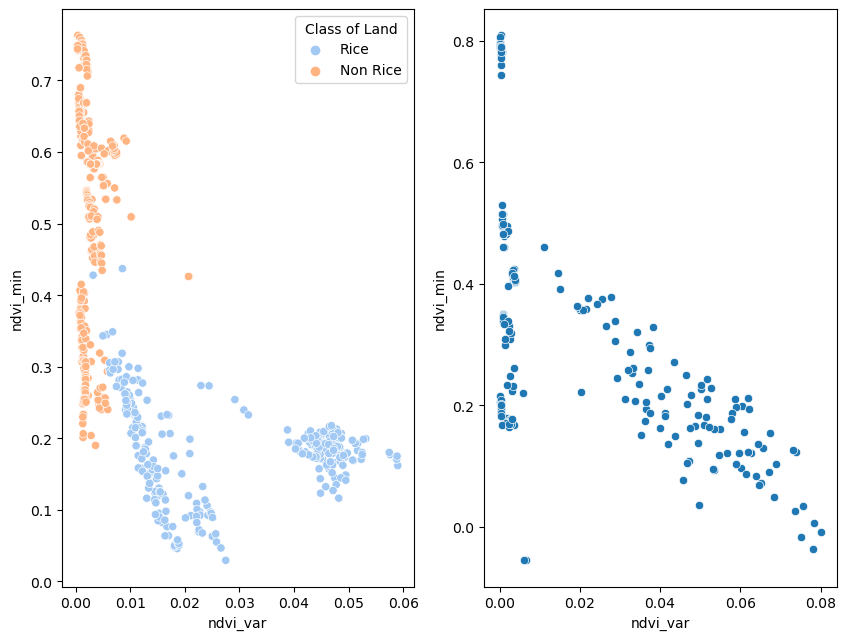

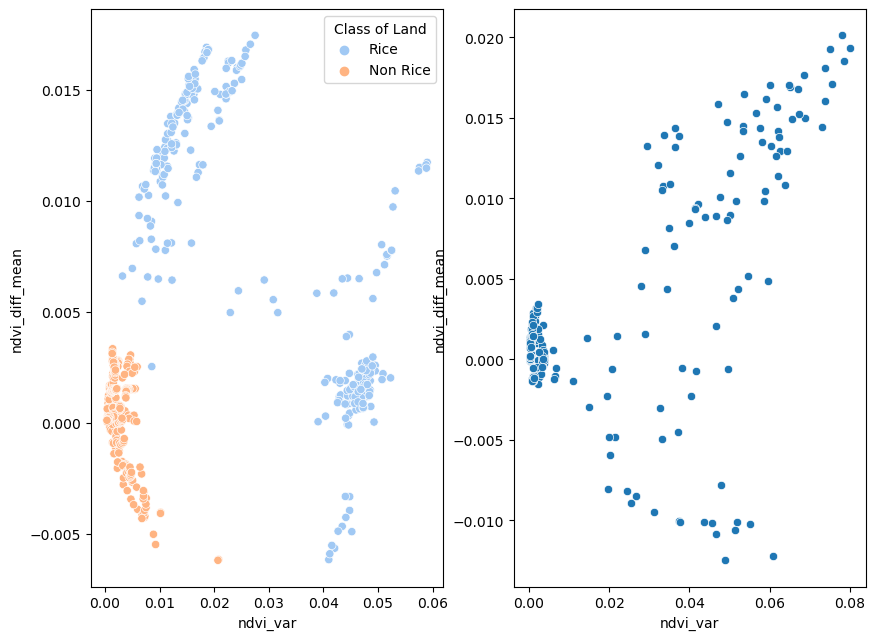

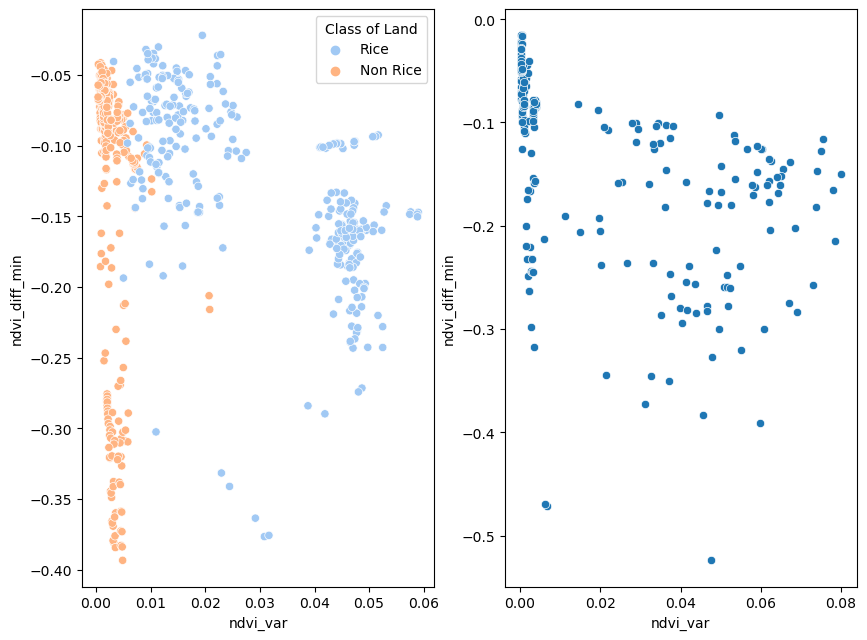

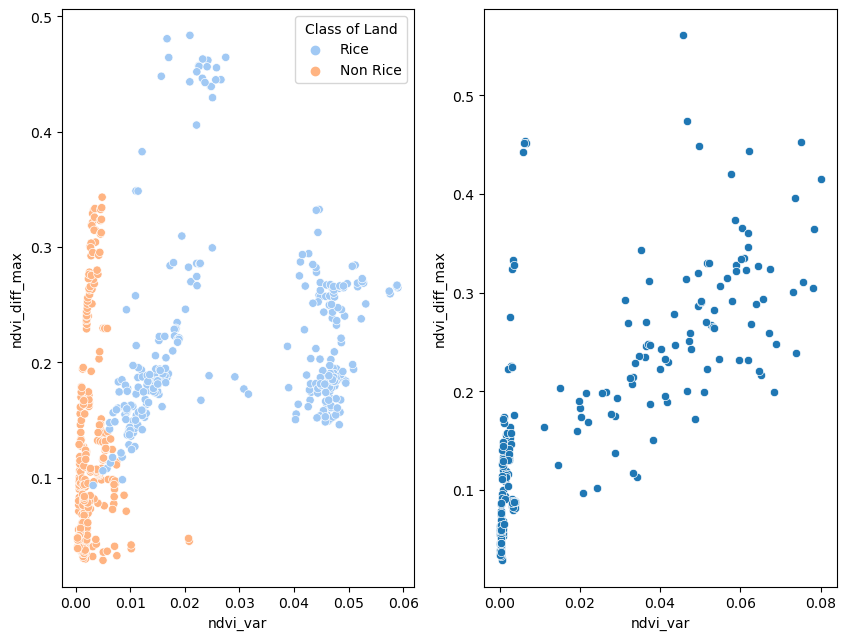

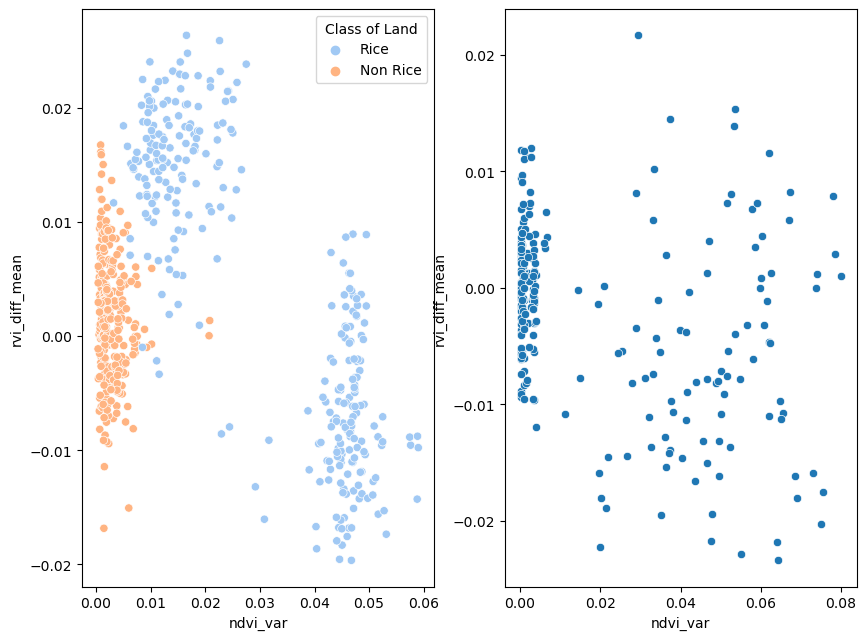

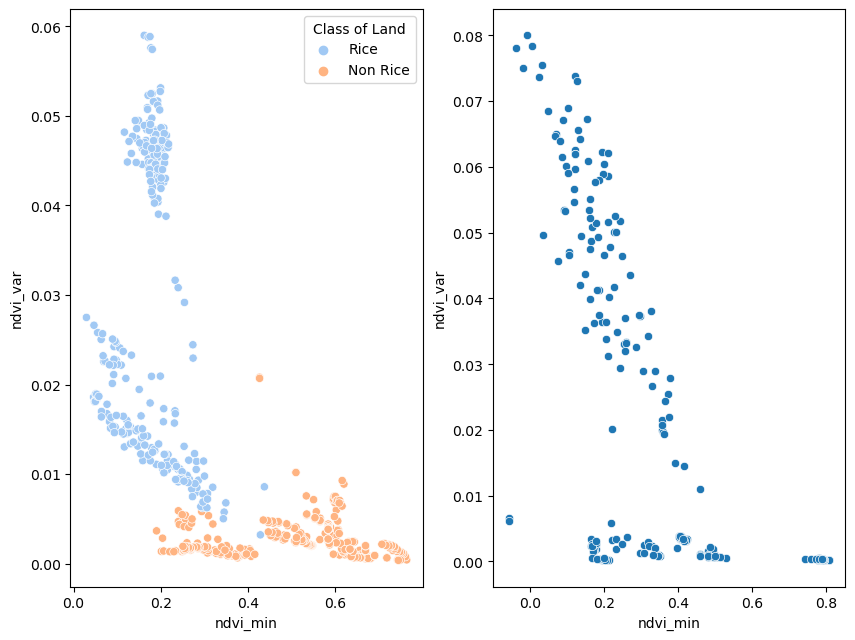

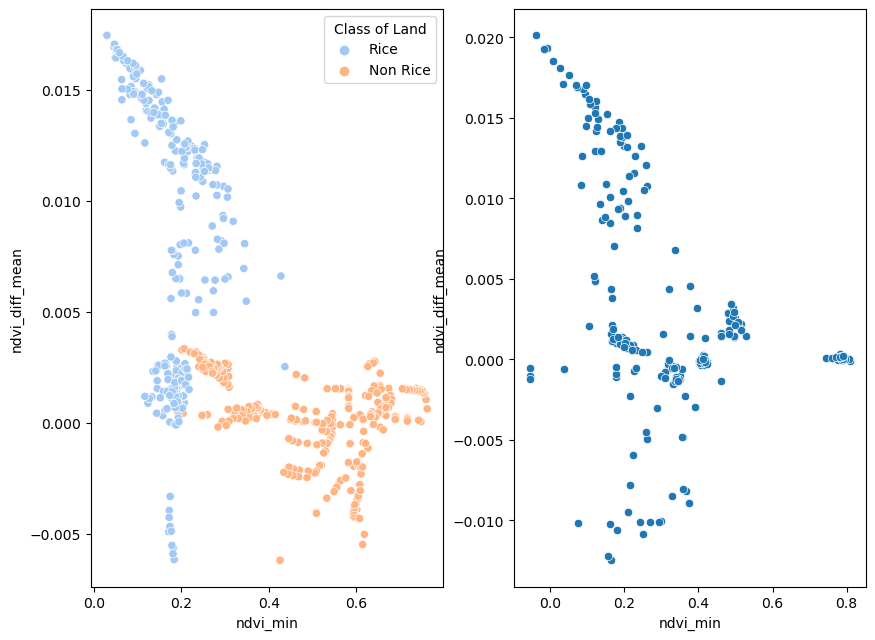

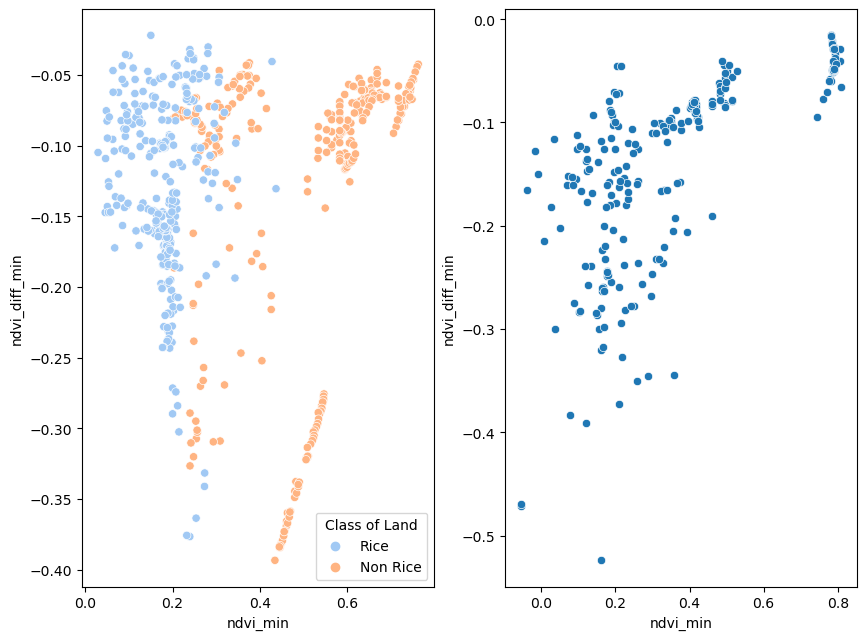

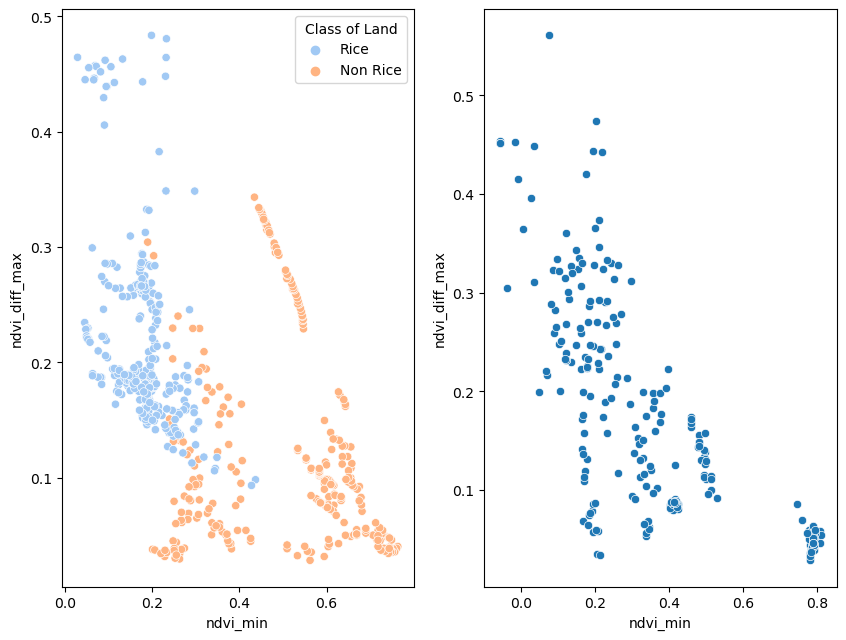

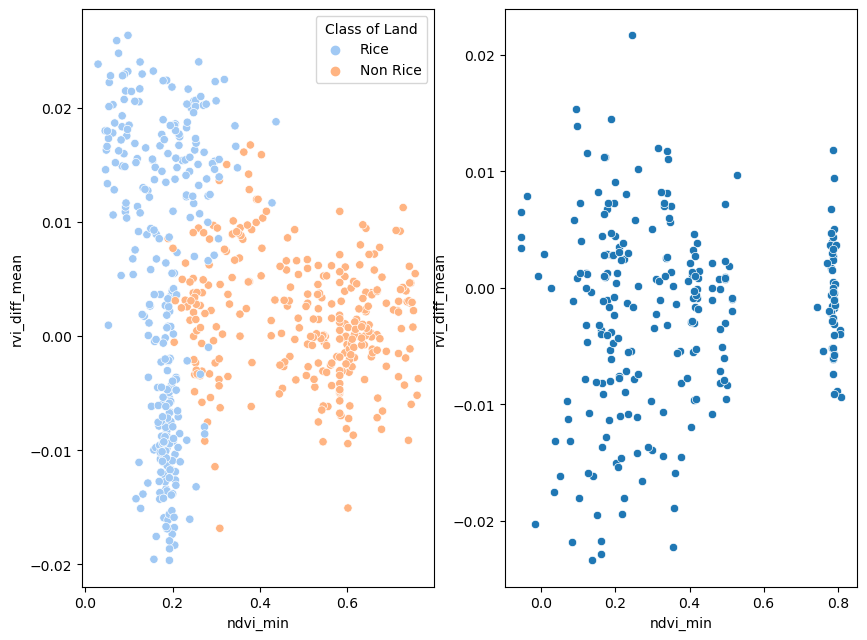

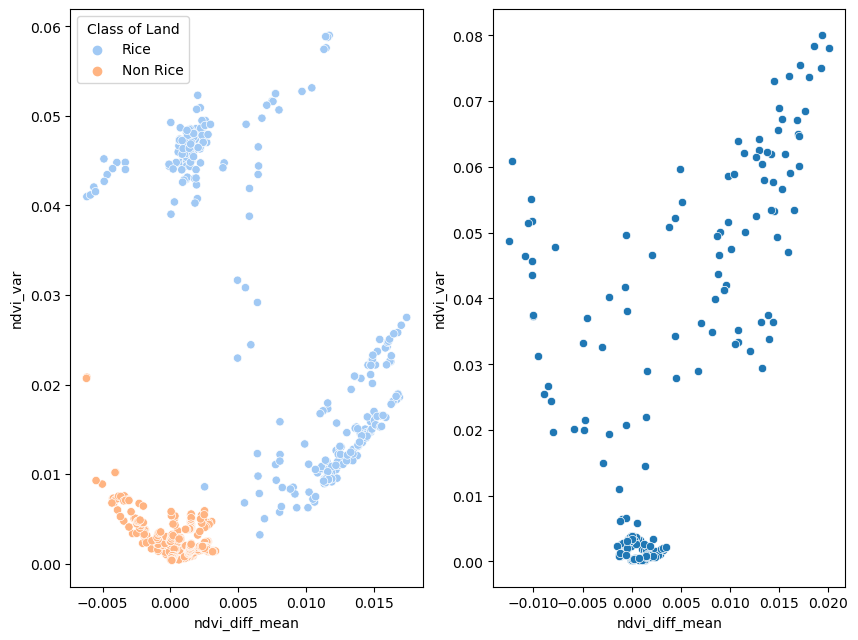

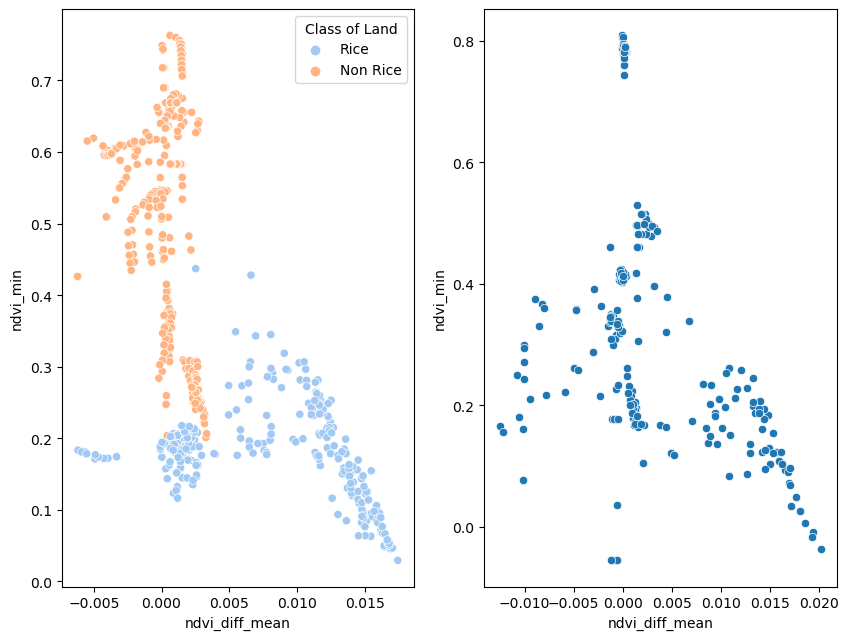

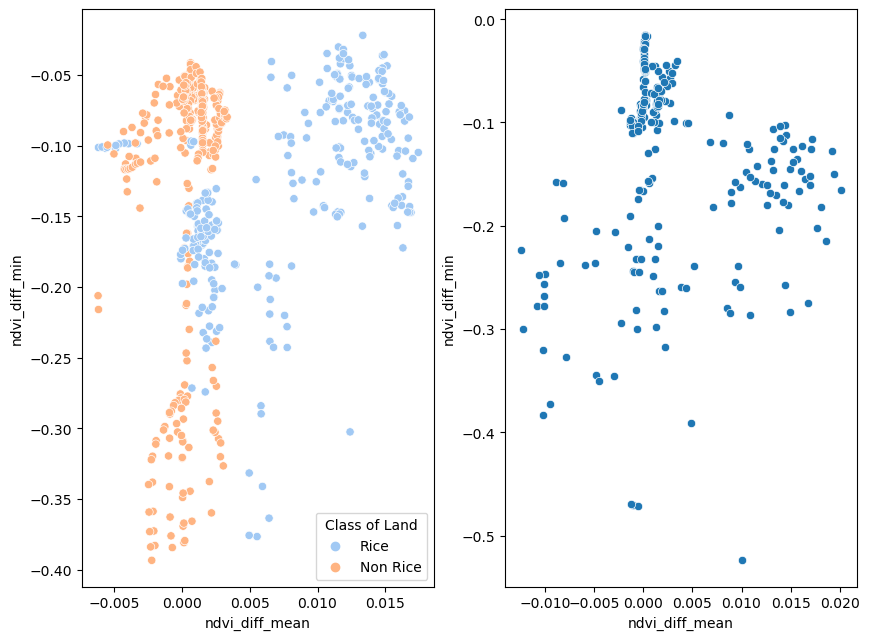

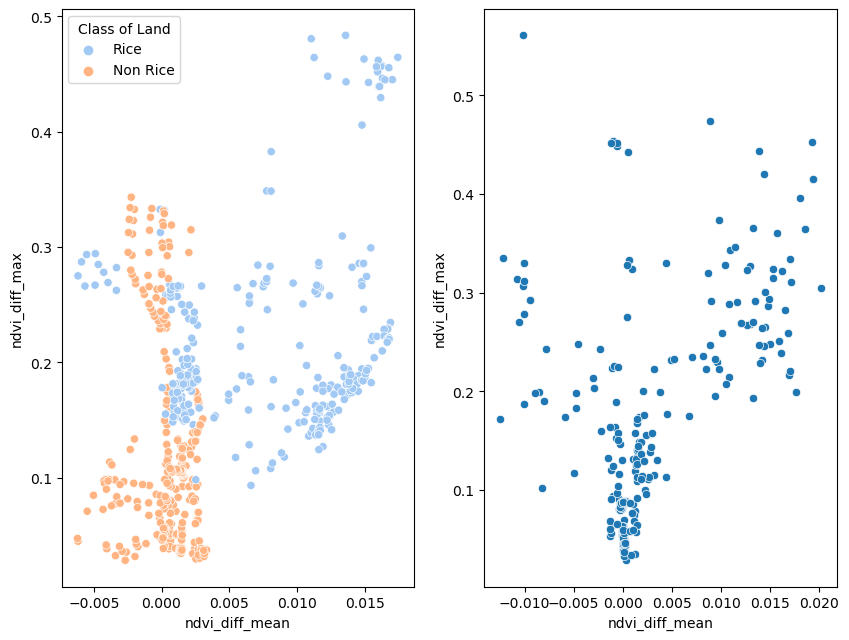

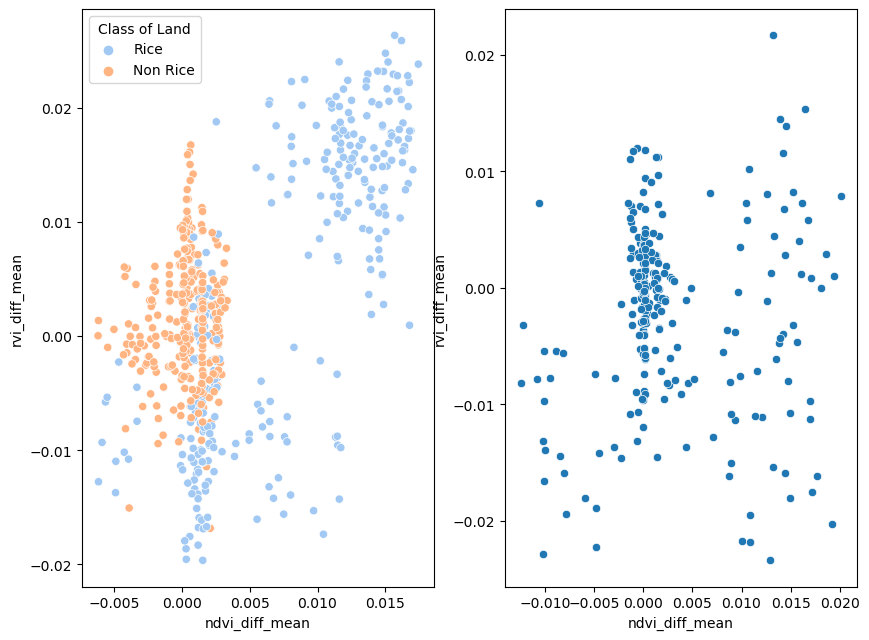

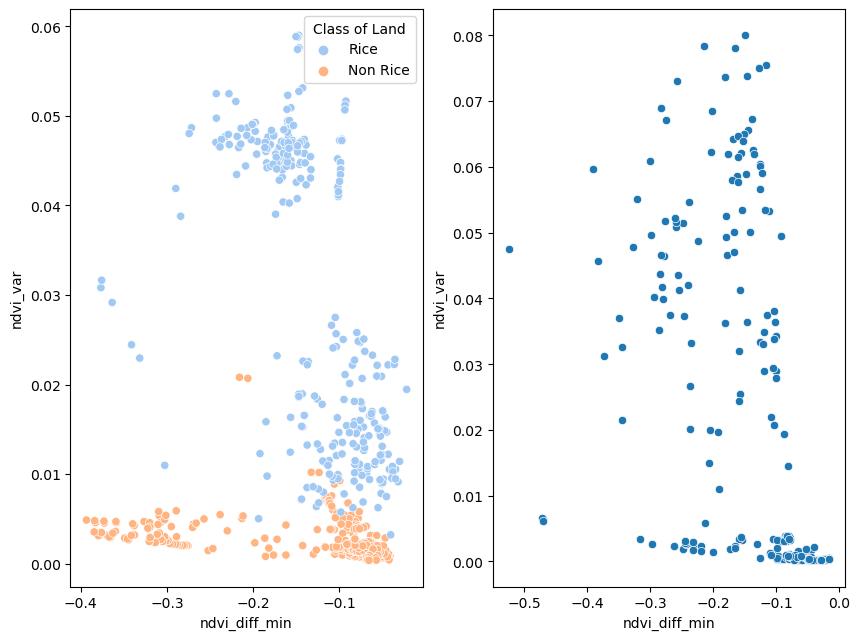

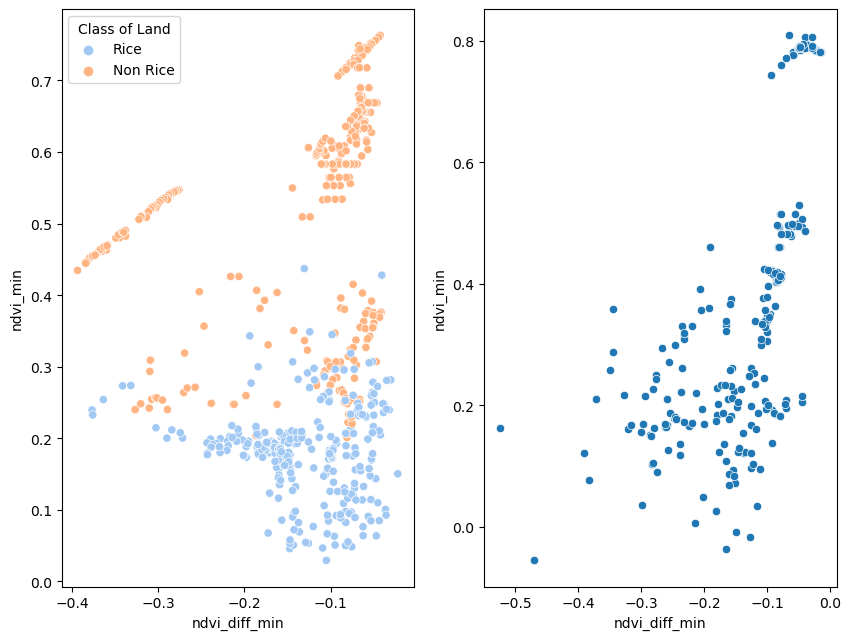

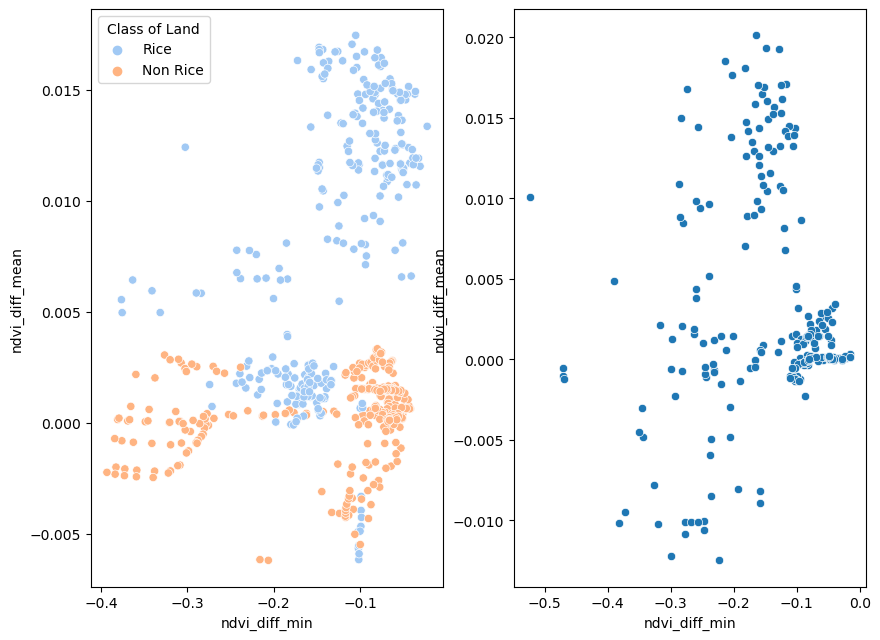

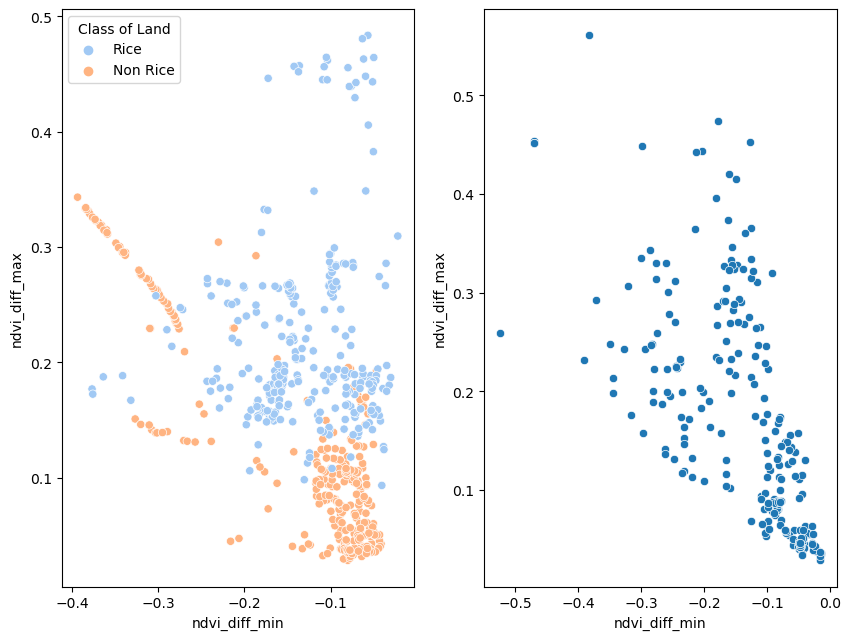

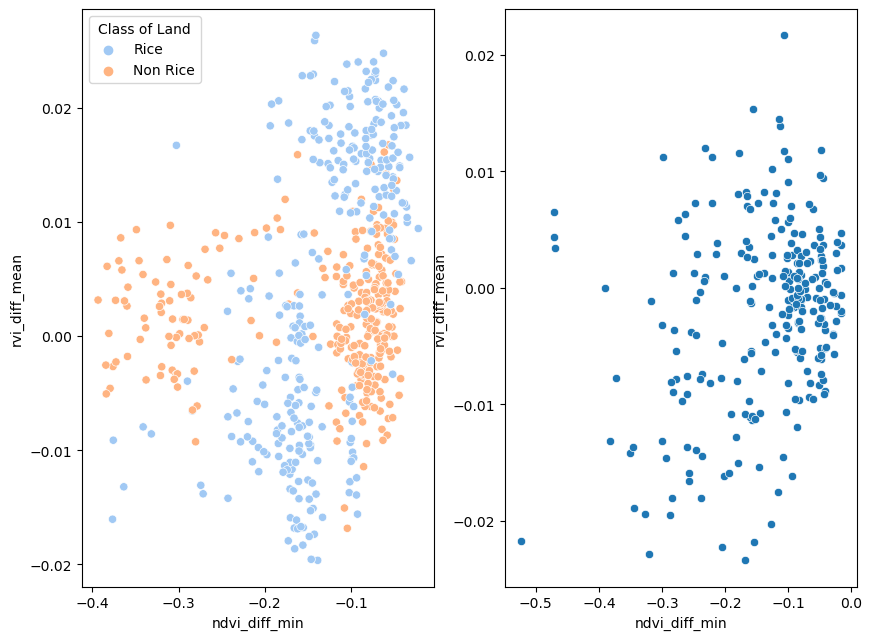

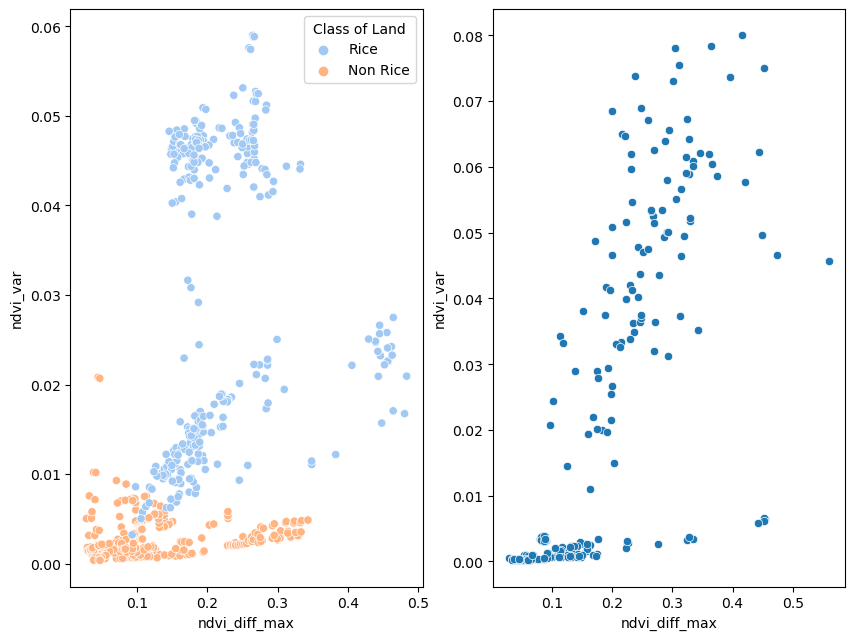

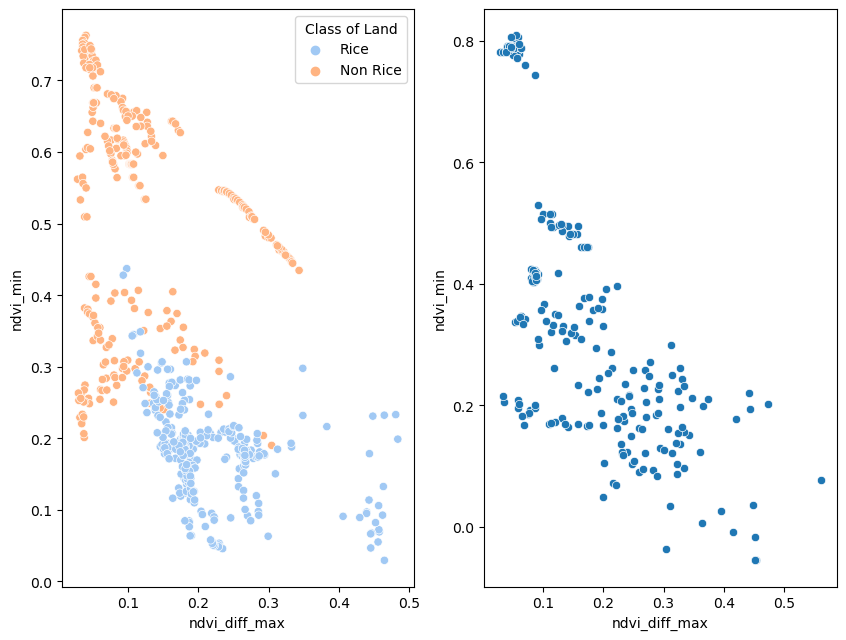

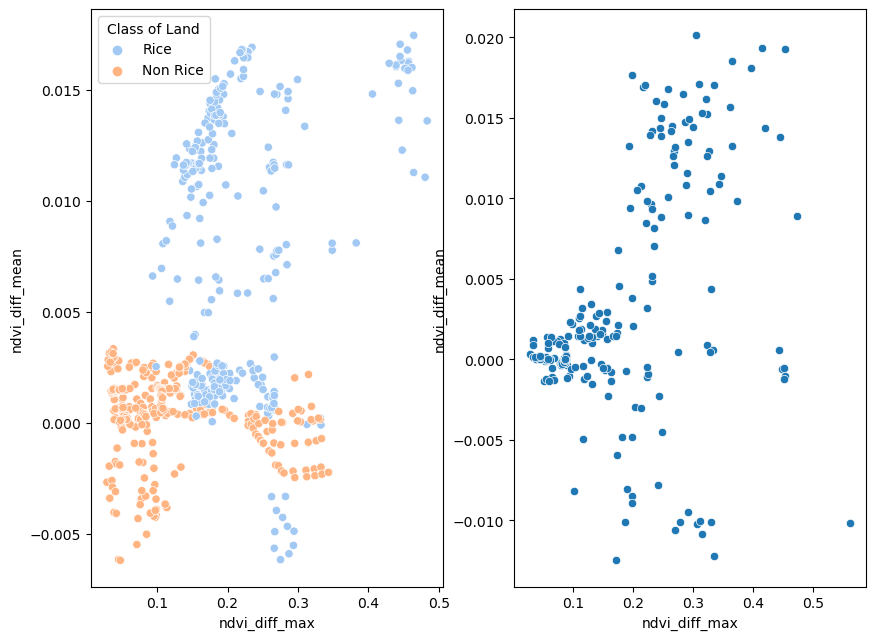

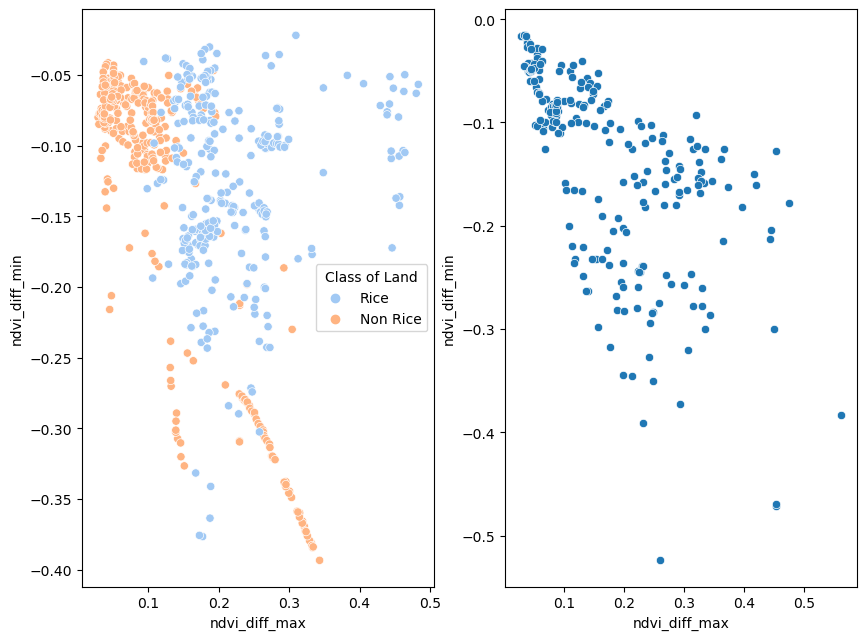

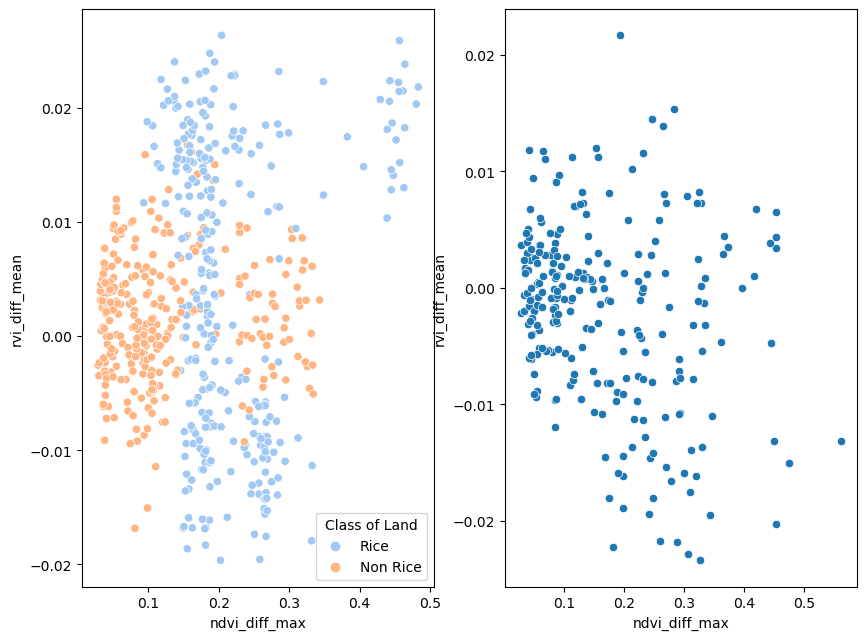

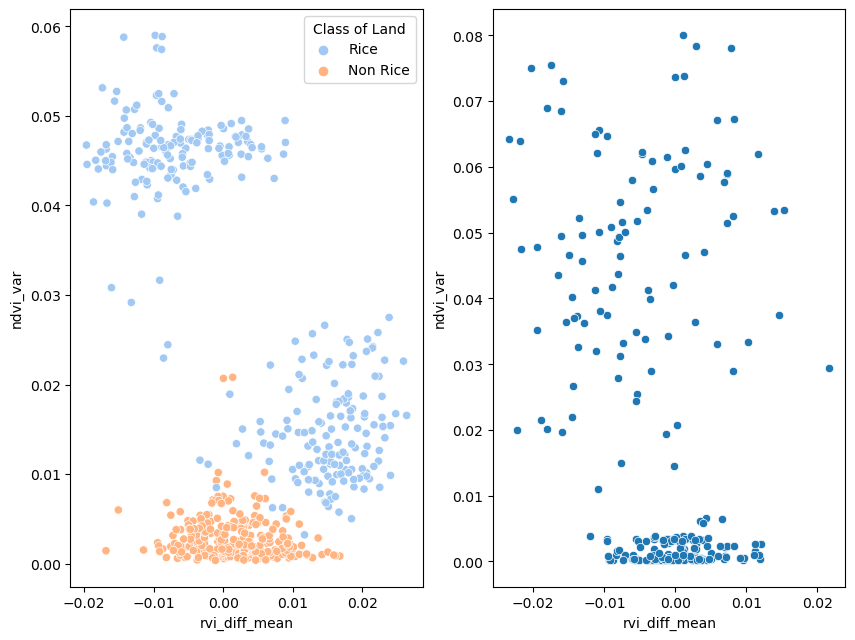

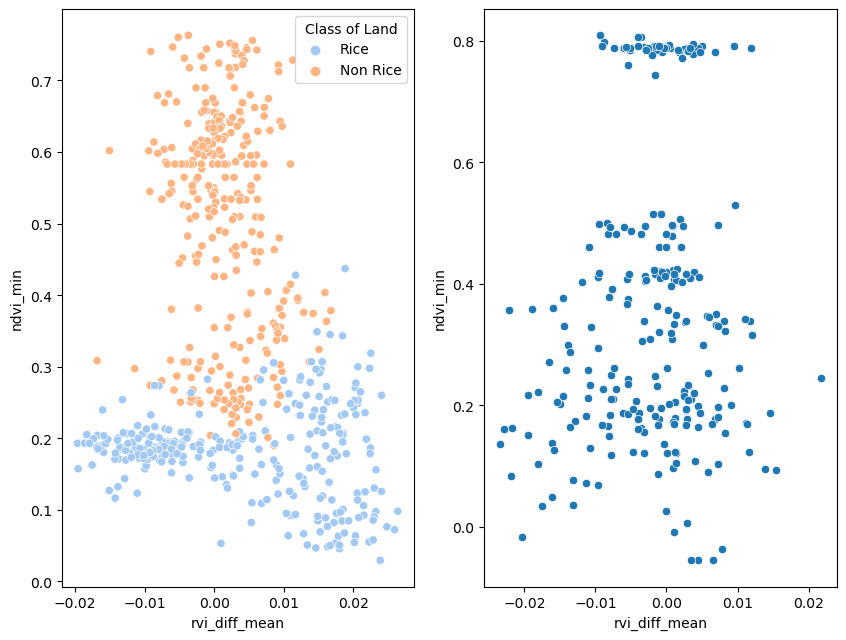

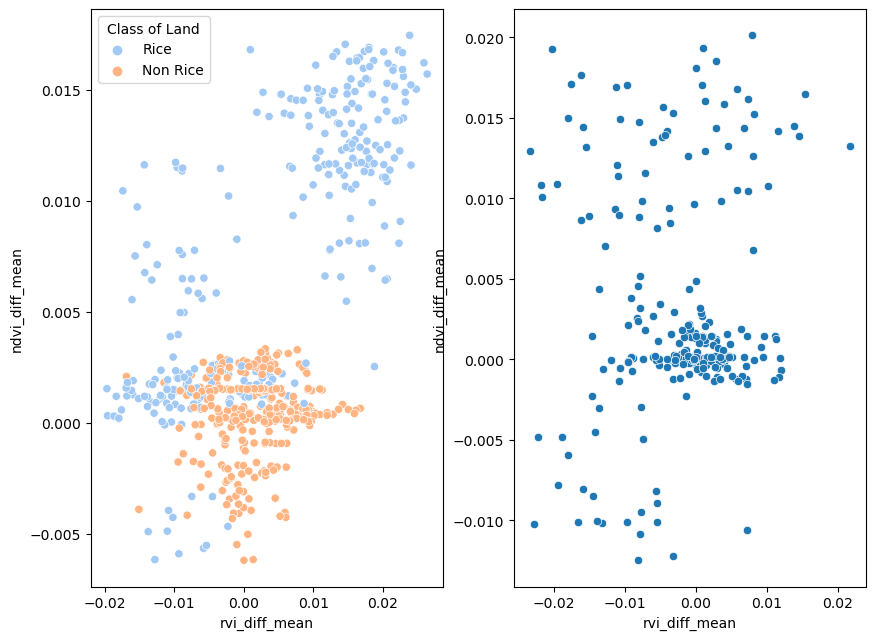

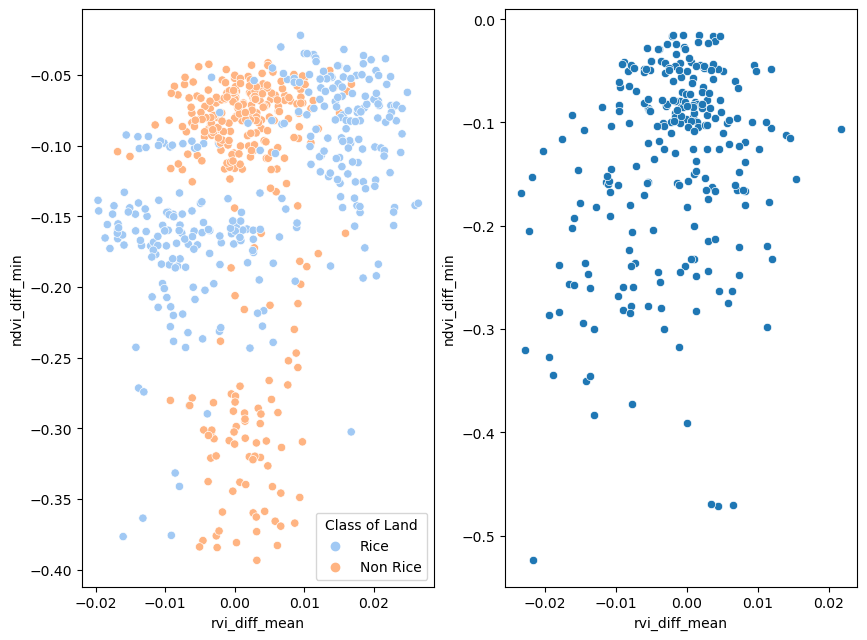

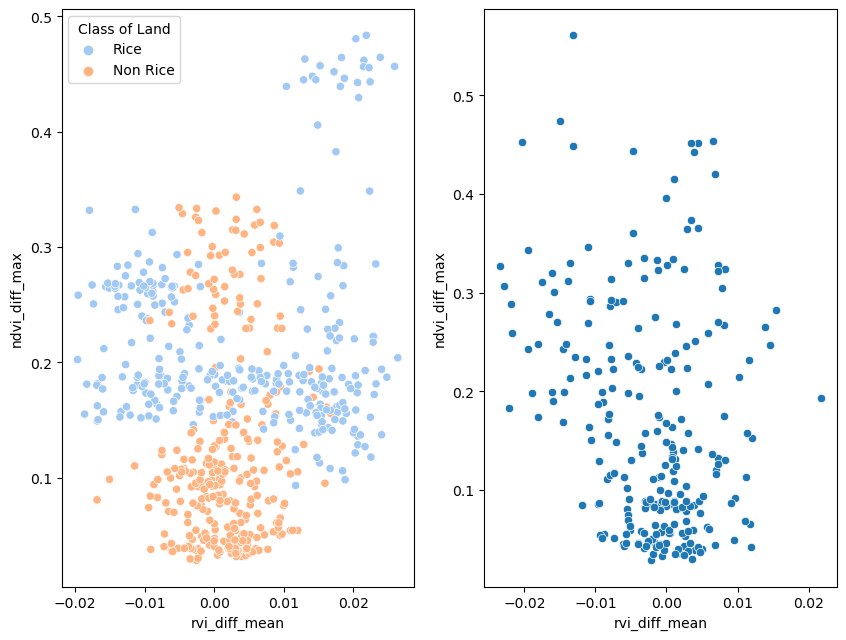

In [285]:
plt.rcParams['figure.figsize'] =[10,7.5]
cols = X.columns
for i in range(len(cols)-1):
    for j in range(len(cols)-1):
        if i!=j:
            fig,axes = plt.subplots(nrows = 1,ncols = 2)
            sns.scatterplot(x=cols[i], y=cols[j], data=train, hue=rvi_y, palette='pastel',ax=axes[0]);
            sns.scatterplot(x=cols[i], y=cols[j], data=test, palette='pastel',ax = axes[1]);

# Model


In [304]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier


In [305]:
X = X
y = rvi_y.map({'Rice':1,"Non Rice":0})

In [306]:
"-".join(X.columns)

'ndvi_var-ndvi_min-ndvi_diff_mean-ndvi_diff_min-ndvi_diff_max-rvi_diff_mean-rvi_diff_var'

In [307]:
scaler = StandardScaler()
lr_bagging = BaggingClassifier(LogisticRegression())
dt_bagging = BaggingClassifier(DecisionTreeClassifier())

In [308]:
lr_pipe = Pipeline(steps = [
('scaler',scaler),
('lr_bagging', lr_bagging),  
])

dt_pipe = Pipeline(steps = [
('dt_bagging', dt_bagging),  
])


In [309]:
clf = VotingClassifier(estimators = [('lr',lr_pipe),('dt',dt_pipe)],voting = 'soft')
skfold = StratifiedKFold()
clf.get_params().keys()

dict_keys(['estimators', 'flatten_transform', 'n_jobs', 'verbose', 'voting', 'weights', 'lr', 'dt', 'lr__memory', 'lr__steps', 'lr__verbose', 'lr__scaler', 'lr__lr_bagging', 'lr__scaler__copy', 'lr__scaler__with_mean', 'lr__scaler__with_std', 'lr__lr_bagging__base_estimator', 'lr__lr_bagging__bootstrap', 'lr__lr_bagging__bootstrap_features', 'lr__lr_bagging__estimator__C', 'lr__lr_bagging__estimator__class_weight', 'lr__lr_bagging__estimator__dual', 'lr__lr_bagging__estimator__fit_intercept', 'lr__lr_bagging__estimator__intercept_scaling', 'lr__lr_bagging__estimator__l1_ratio', 'lr__lr_bagging__estimator__max_iter', 'lr__lr_bagging__estimator__multi_class', 'lr__lr_bagging__estimator__n_jobs', 'lr__lr_bagging__estimator__penalty', 'lr__lr_bagging__estimator__random_state', 'lr__lr_bagging__estimator__solver', 'lr__lr_bagging__estimator__tol', 'lr__lr_bagging__estimator__verbose', 'lr__lr_bagging__estimator__warm_start', 'lr__lr_bagging__estimator', 'lr__lr_bagging__max_features', 'lr__

In [310]:

param_grid = {
    
    'lr__lr_bagging__n_estimators':[1,2,3,4,5,6,7,8,9,10,20],
    'dt__dt_bagging__n_estimators':[1,2,3,4,5,6,7,8,9,10,20],
# 'lr__lr_bagging__base_estimator__C':[0.1,0.5],
# 'lr__lr_bagging__base_estimator__class_weight':[None],
# 'lr__lr_bagging__base_estimator__fit_intercept':[True],
# 'lr__lr_bagging__base_estimator__intercept_scaling':[1],
# 'lr__lr_bagging__base_estimator__l1_ratio':[0.5],
# 'lr__lr_bagging__n_estimators':[1,2,3,6,10,20],
# 'lr__lr_bagging__max_features':[0.6],
# 'lr__lr_bagging__max_samples':[0.5],
# 'lr__lr_bagging__bootstrap':[True],
# 'lr__lr_bagging__bootstrap_features':[False],
# 'lr__lr_bagging__oob_score':[True],  
# 'lr__lr_bagging__random_state':[123],
# 'dt__dt_bagging__base_estimator__class_weight':[None],
# 'dt__dt_bagging__base_estimator__criterion':['entropy'],
# 'dt__dt_bagging__base_estimator__splitter':['best'],    
# 'dt__dt_bagging__base_estimator__max_depth':[1,2,3,6,10,20],
# 'dt__dt_bagging__base_estimator__max_features':[None],
# 'dt__dt_bagging__n_estimators':[1,2,3],
# 'dt__dt_bagging__max_features':[0.6],
# 'dt__dt_bagging__max_samples':[0.5],
# 'dt__dt_bagging__bootstrap':[True],
# 'dt__dt_bagging__bootstrap_features':[False],
# 'dt__dt_bagging__oob_score':[True],  
# 'dt__dt_bagging__random_state':[123],    
}
gcv = GridSearchCV(estimator = clf, param_grid = param_grid, scoring = 'neg_log_loss',cv = skfold,verbose = 1)


In [311]:
# clf = VotingClassifier(estimators = [('lr',lr_pipe),('dt',dt_pipe)],voting = 'soft')




# param_grid = {
# 'lr__lr_bagging__base_estimator__C':[0.1,0.5,1.0,2.0],
# 'lr__lr_bagging__base_estimator__class_weight':[None,'balanced'],
# 'lr__lr_bagging__base_estimator__fit_intercept':[True,False],
# 'lr__lr_bagging__base_estimator__intercept_scaling':[True,False],
# 'lr__lr_bagging__base_estimator__l1_ratio':[0.1,0.5,0.9],
# 'lr__lr_bagging__n_estimators':[1,2,3,4,5,6],
# 'lr__lr_bagging__max_features':[0.2,0.5,0.7],
# 'lr__lr_bagging__max_samples':[0.2,0.4,0.5,0.9,1.0],
# 'lr__lr_bagging__bootstrap':[True,False],
# 'lr__lr_bagging__bootstrap_features':[True,False],
# 'lr__lr_bagging__oob_score':[True,False],  
# 'lr__lr_bagging__random_state':[123],
# 'dt__dt_bagging__base_estimator__class_weight':[None,'balanced'],
# 'dt__dt_bagging__base_estimator__criterion':['gini', 'entropy'],
# 'dt__dt_bagging__base_estimator__splitter':['best','random'],    
# 'dt__dt_bagging__base_estimator__max_depth':[1,2,3,4],
# 'dt__dt_bagging__base_estimator__max_features':[None,'sqrt','log2'],
# 'dt__dt_bagging__n_estimators':[1,2,3,4,5,6],
# 'dt__dt_bagging__max_features':[0.2,0.5,0.7],
# 'dt__dt_bagging__max_samples':[0.2,0.4,0.5,0.9,1.0],
# 'dt__dt_bagging__bootstrap':[True,False],
# 'dt__dt_bagging__bootstrap_features':[True,False],
# 'dt__dt_bagging__oob_score':[True,False],  
# 'dt__dt_bagging__random_state':[123],    
# }
    
# clf.get_params().keys()

In [312]:

# skfold = StratifiedKFold()

# gcv = GridSearchCV(estimator = clf,param_grid = param_grid, scoring = 'f1', cv = skfold,verbose = 1 , n_jobs=-1) #

In [313]:
%%time
gcv.fit(X,y)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
Wall time: 41.6 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=VotingClassifier(estimators=[('lr',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('lr_bagging',
                                                                      BaggingClassifier(estimator=LogisticRegression()))])),
                                                    ('dt',
                                                     Pipeline(steps=[('dt_bagging',
                                                                      BaggingClassifier(estimator=DecisionTreeClassifier()))]))],
                                        voting='soft'),
             param_grid={'dt__dt_bagging__n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 20],
                         'lr__lr_bagging__n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 20]},
             scoring='neg_log_loss', verbose=1)

In [314]:
results = pd.DataFrame(gcv.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True)
results[:40]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.014034      0.001186         0.003311        0.000585   
1        0.012612      0.000991         0.002599        0.000491   
2        0.036712      0.003847         0.004728        0.000641   
3        0.021441      0.001392         0.003209        0.000394   
4        0.058445      0.004319         0.005801        0.001116   
5        0.100411      0.003049         0.005862        0.000444   
6        0.037168      0.001878         0.004491        0.000852   
7        0.022628      0.001490         0.003189        0.000367   
8        0.019761      0.001785         0.003429        0.000529   
9        0.040292      0.002505         0.004908        0.000296   
10       0.058078      0.007297         0.006061        0.000879   
11       0.041277      0.005991         0.005374        0.000988   
12       0.088001      0.005170         0.008202        0.000723   
13       0.021958      0.002652         0.003886        0.000892   
14       0.035255      0.003748         0.004944        0.000512   
15       0.048696      0.003620         0.005043        0.000641   
16       0.058836      0.001769         0.005093        0.000660   
17       0.135712      0.012819         0.007896        0.000980   
18       0.429166      0.236399         0.017543        0.005079   
19       0.085959      0.006283         0.007957        0.001273   
20       0.064574      0.001864         0.006691        0.000466   
21       0.033612      0.002546         0.004702        0.000713   
22       0.027856      0.001163         0.004394        0.000430   
23       0.047864      0.002410         0.005165        0.000530   
24       0.034083      0.004217         0.003333        0.000413   
25       0.102387      0.004585         0.006111        0.000670   
26       0.058034      0.006344         0.006215        0.000401   
27       0.052440      0.005073         0.005409        0.000370   
28       0.043461      0.001893         0.006413        0.000964   
29       0.075692      0.004791         0.007081        0.000645   
30       0.047033      0.001377         0.006329        0.001275   
31       0.040773      0.003368         0.006022        0.000576   
32       0.019078      0.001321         0.003134        0.000214   
33       0.041342      0.001630         0.004926        0.000512   
34       0.041691      0.002813         0.006016        0.000033   
35       0.047567      0.001766         0.004644        0.000833   
36       0.052891      0.003901         0.005073        0.000622   
37       0.039374      0.005671         0.005136        0.000829   
38       0.057235      0.002067         0.005900        0.000754   
39       0.163195      0.093657         0.008936        0.001996   

   param_dt__dt_bagging__n_estimators param_lr__lr_bagging__n_estimators  \
0                                   2                                  1   
1                                   1                                  2   
2                                   5                                  4   
3                                   1                                  5   
4                                   3                                  9   
5                                   3                                 20   
6                                   1                                  7   
7                                   2                                  4   
8                                   2                                  3   
9                                   5                                  5   
10                                 10                                  3   
11                                  7                                  4   
12                                  9                                  9   
13                                  2                                  2   
14                                  3                                  4   

In [328]:
name = results.params[2]
name

{'dt__dt_bagging__n_estimators': 5, 'lr__lr_bagging__n_estimators': 4}

In [318]:
gcv.best_score_

-0.021360333012362537

In [337]:
filename = "_".join(f"{i}_{j}" for i,j in zip(name.keys(),name.values())) +"_".join(X.columns) +'.csv'
filename

'dt__dt_bagging__n_estimators_5_lr__lr_bagging__n_estimators_4ndvi_var_ndvi_min_ndvi_diff_mean_ndvi_diff_min_ndvi_diff_max_rvi_diff_mean_rvi_diff_var.csv'

In [333]:
clf = VotingClassifier(estimators = [('lr',lr_pipe),('dt',dt_pipe)],voting = 'soft')
clf.params = results.params[2]
clf.fit(X,y)
y_pred = clf.predict(X_test)

In [340]:
y_pred_proba = clf.predict_proba(X_test)

In [350]:
y_pred_proba[(y_pred_proba[:,1]>0.4) &(y_pred_proba[:,1]<0.6)]

array([[0.49759276, 0.50240724],
       [0.49616411, 0.50383589],
       [0.543489  , 0.456511  ],
       [0.54664513, 0.45335487],
       [0.45588389, 0.54411611],
       [0.49593505, 0.50406495],
       [0.47624558, 0.52375442],
       [0.53966895, 0.46033105],
       [0.49735621, 0.50264379],
       [0.49606221, 0.50393779],
       [0.40459004, 0.59540996],
       [0.49880241, 0.50119759],
       [0.49485262, 0.50514738],
       [0.42931538, 0.57068462],
       [0.47569358, 0.52430642]])

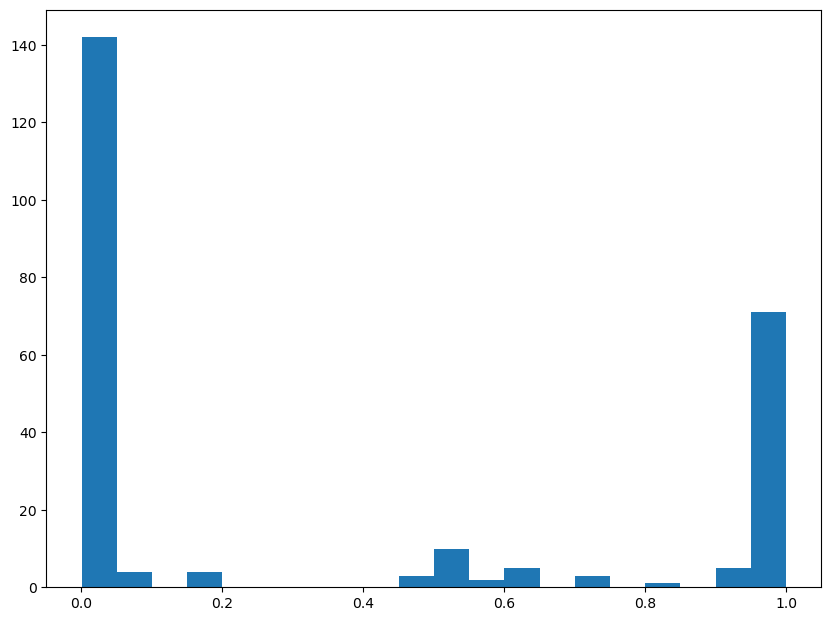

In [347]:
#plt.hist(y_pred_proba[:,1],bins = 20);

In [320]:
best_model = gcv.best_estimator_
y_pred = best_model.predict(X_test)

In [334]:
sub = pd.read_csv('challenge_1_submission_template_correct_columns_fixed.csv')
sub['target'] = y_pred
sub['target'] = sub['target'].map({1:'Rice',0:'Non Rice'})
sub['target'].value_counts()

Non Rice    153
Rice         97
Name: target, dtype: int64

In [335]:
sub

id    target
0     (10.18019073690894, 105.32022315786804)      Rice
1    (10.561107033461816, 105.12772097986661)      Rice
2    (10.623790611954897, 105.13771401411867)      Rice
3    (10.583364246115156, 105.23946127195805)  Non Rice
4     (10.20744446668854, 105.26844107128906)      Rice
..                                        ...       ...
245  (10.308283266873062, 105.50872812216863)  Non Rice
246  (10.582910017285496, 105.23991550078767)  Non Rice
247  (10.581547330796518, 105.23991550078767)  Non Rice
248  (10.629241357910818, 105.15315779432643)      Rice
249  (10.574733898351617, 105.10410108072531)      Rice

[250 rows x 2 columns]

In [338]:
filename

'dt__dt_bagging__n_estimators_5_lr__lr_bagging__n_estimators_4ndvi_var_ndvi_min_ndvi_diff_mean_ndvi_diff_min_ndvi_diff_max_rvi_diff_mean_rvi_diff_var.csv'

In [339]:
sub.to_csv(filename,index = False)

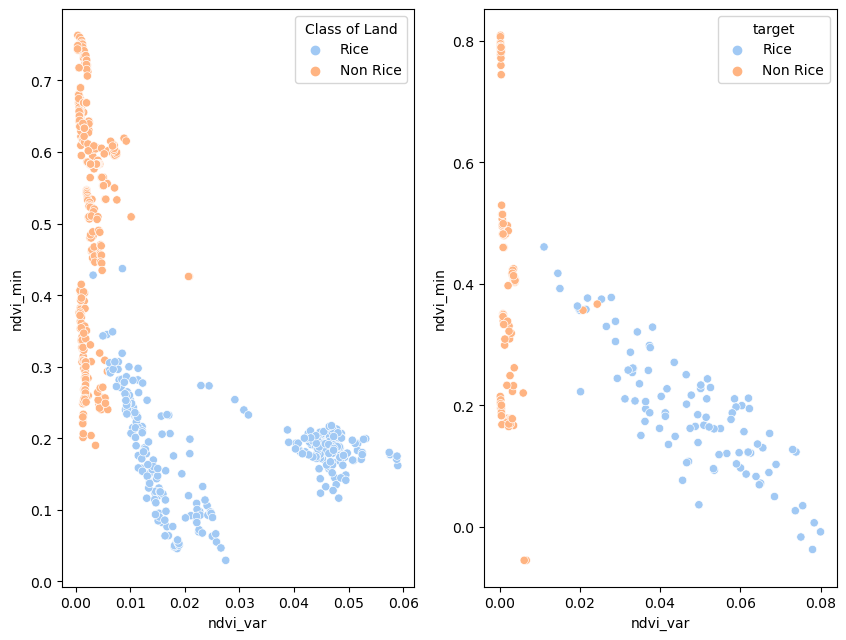

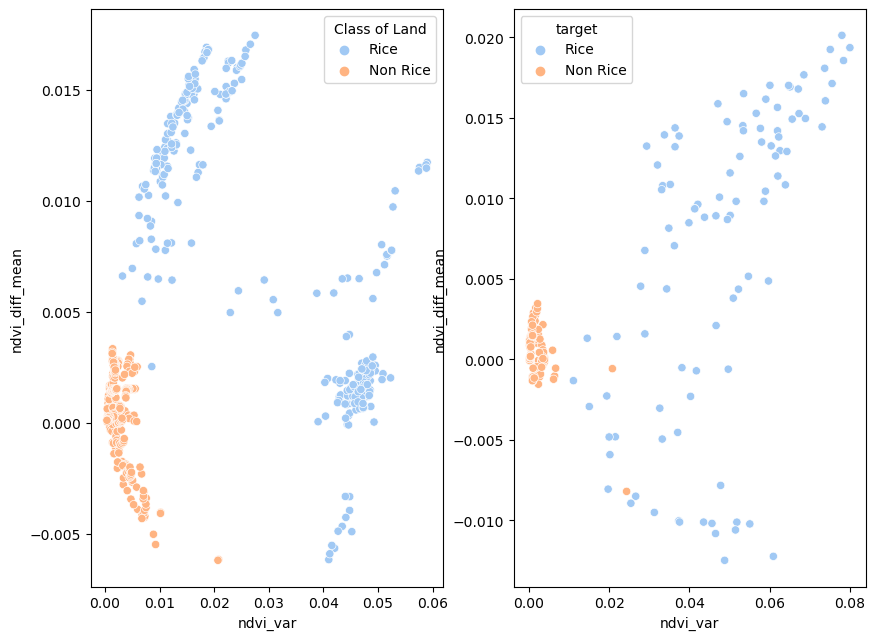

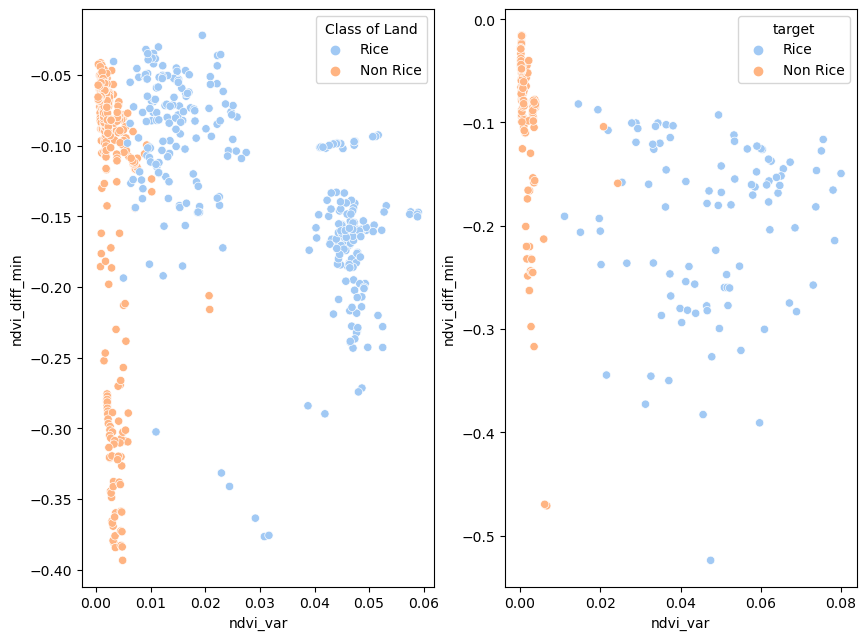

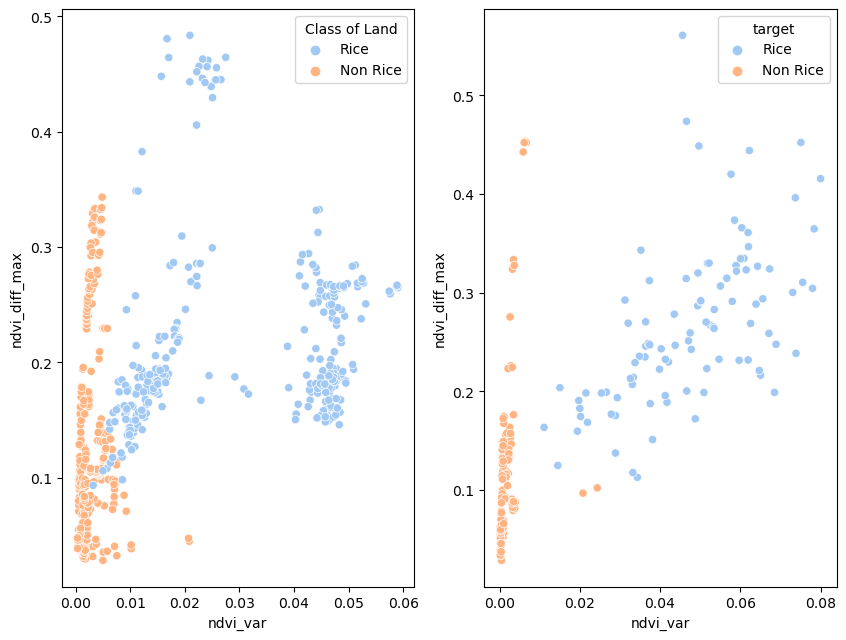

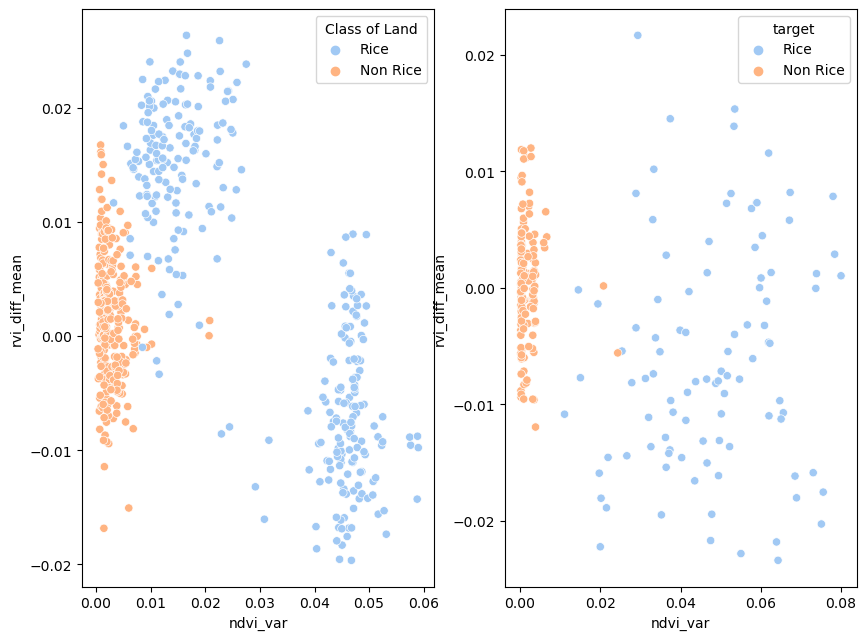

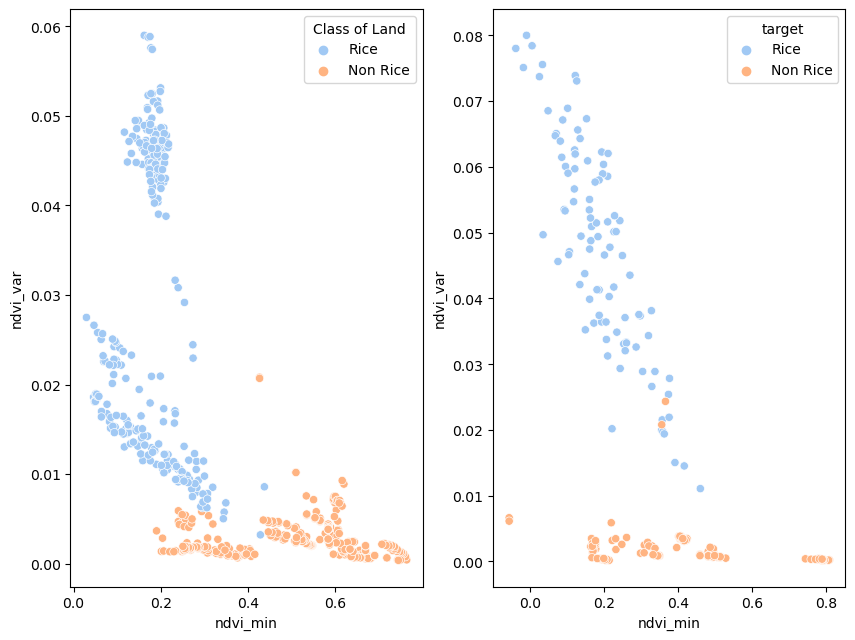

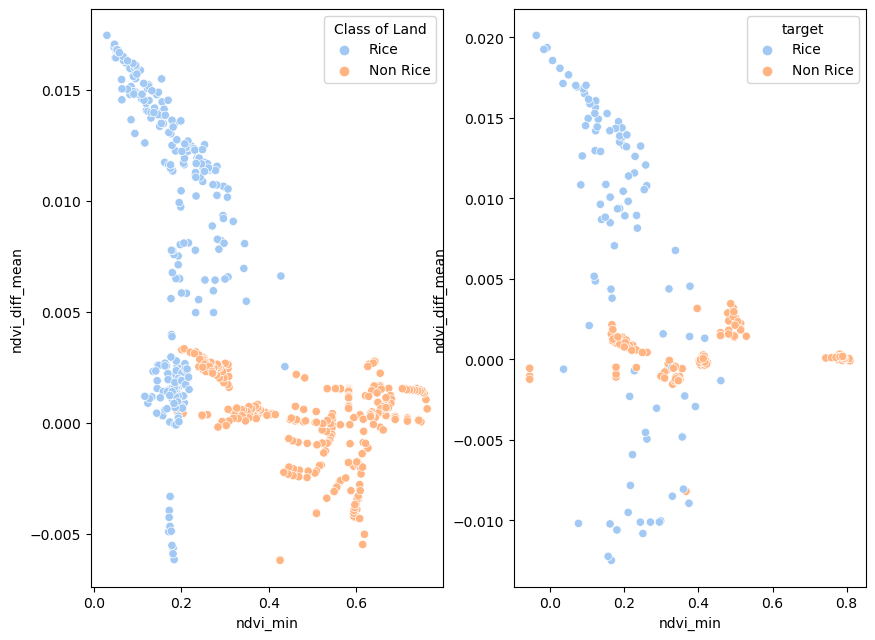

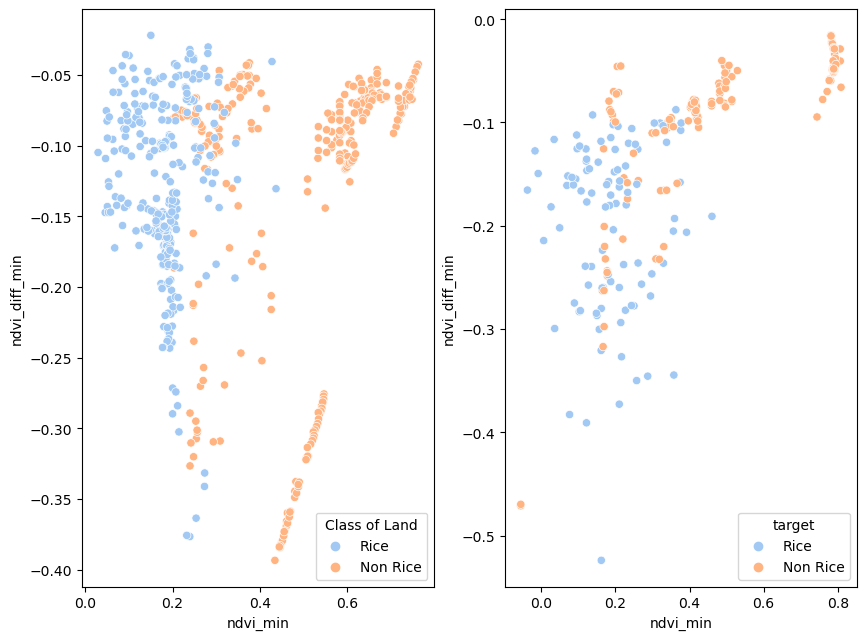

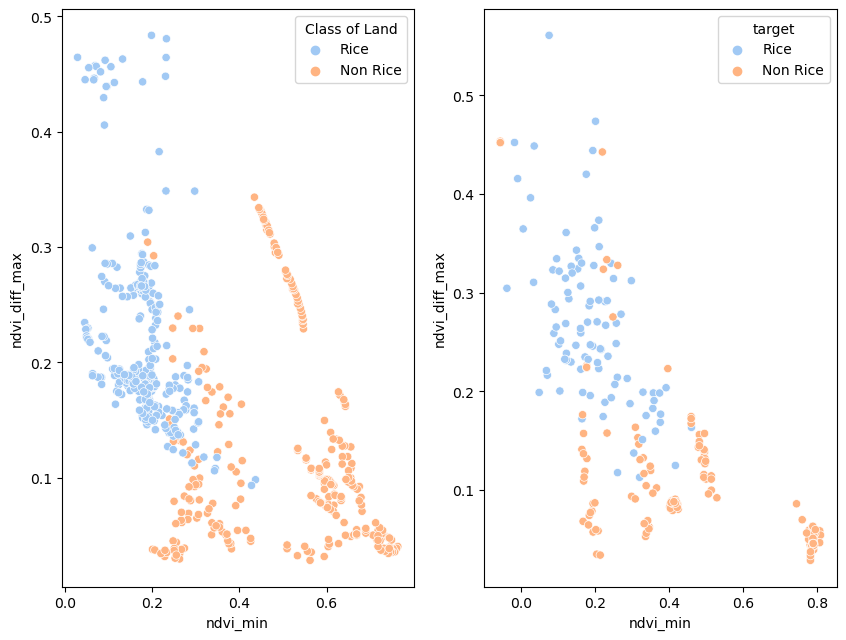

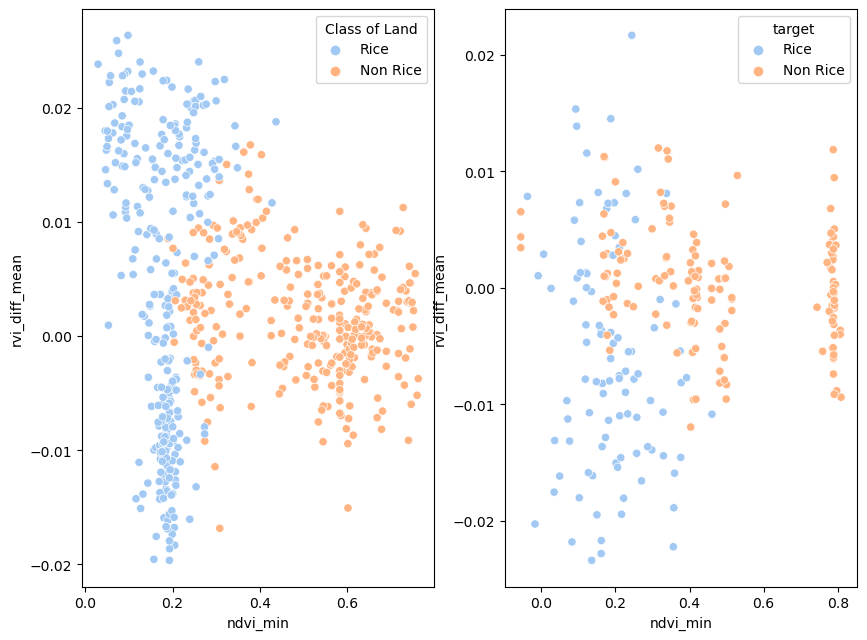

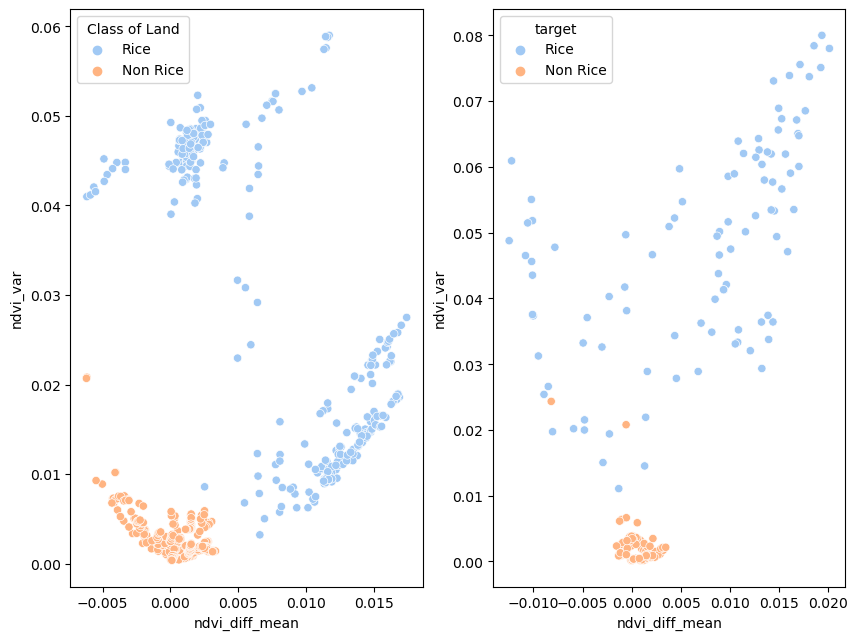

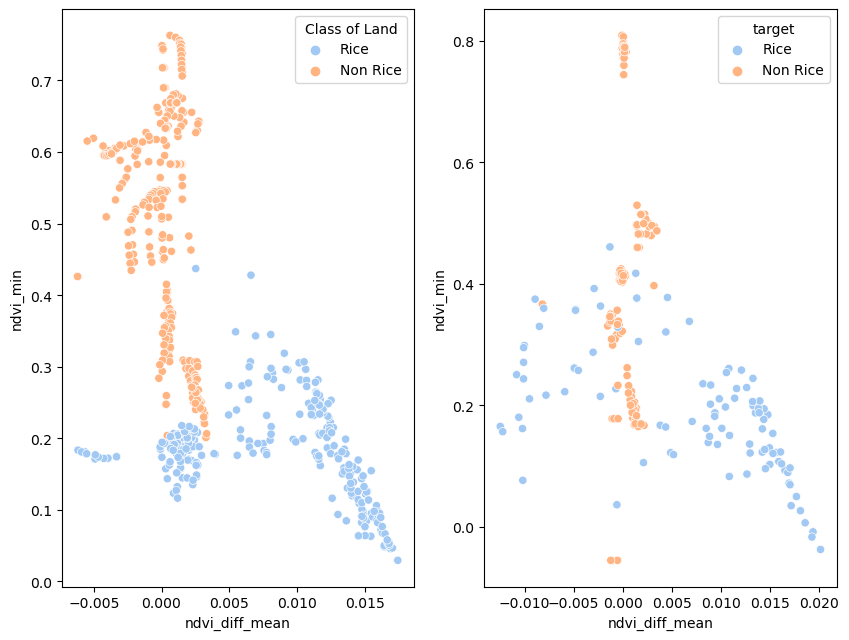

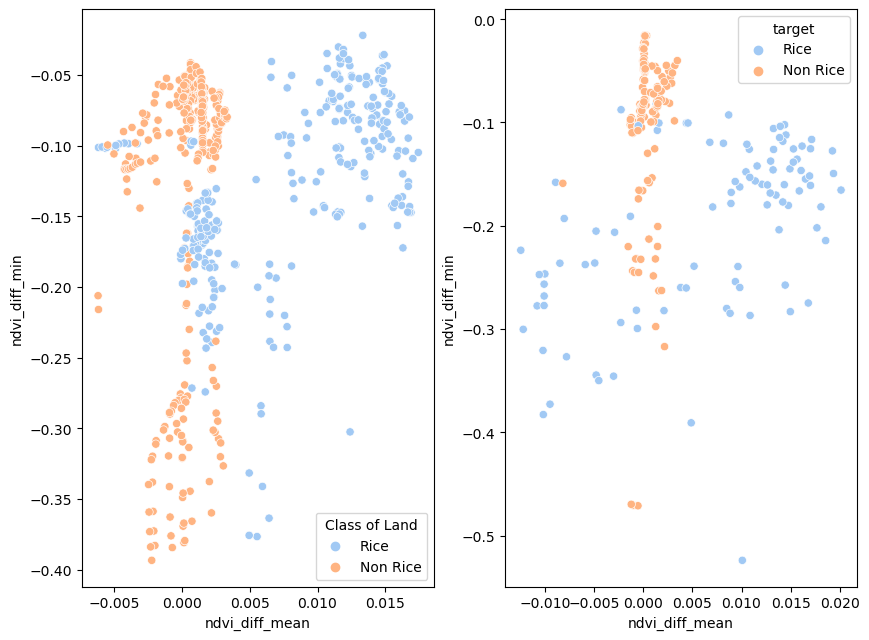

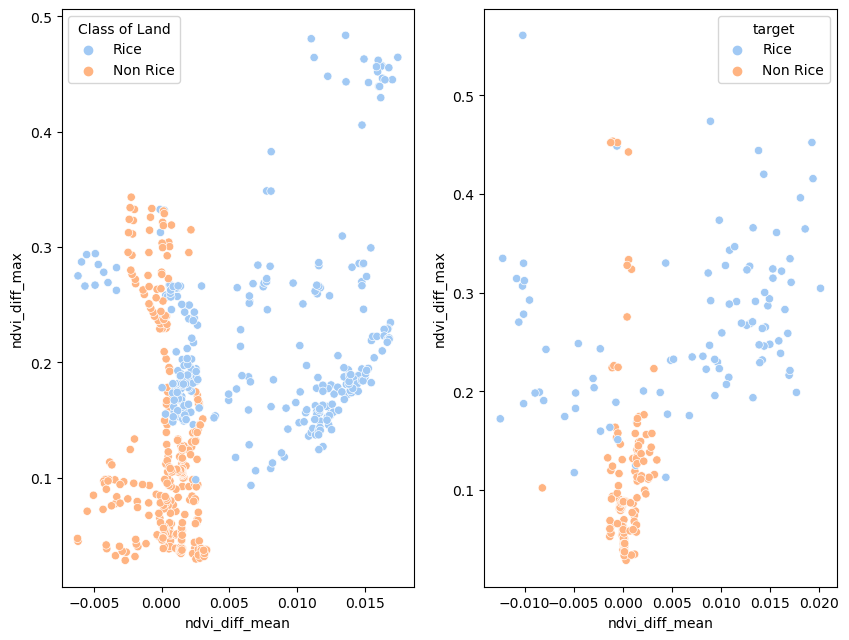

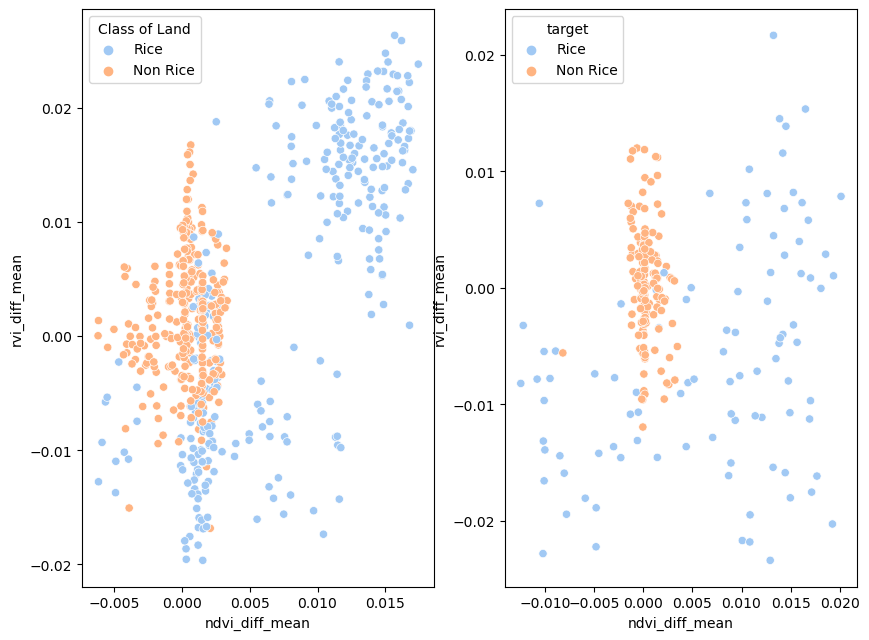

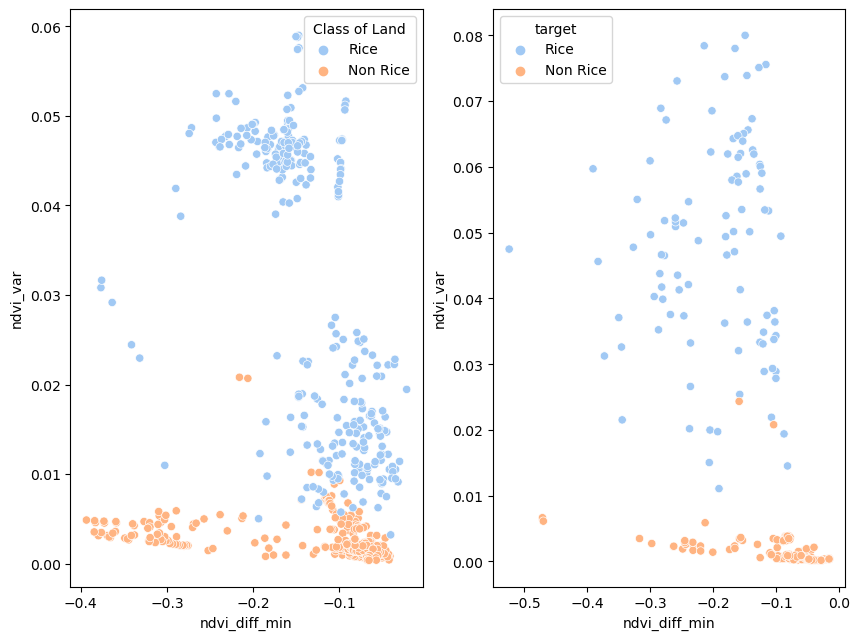

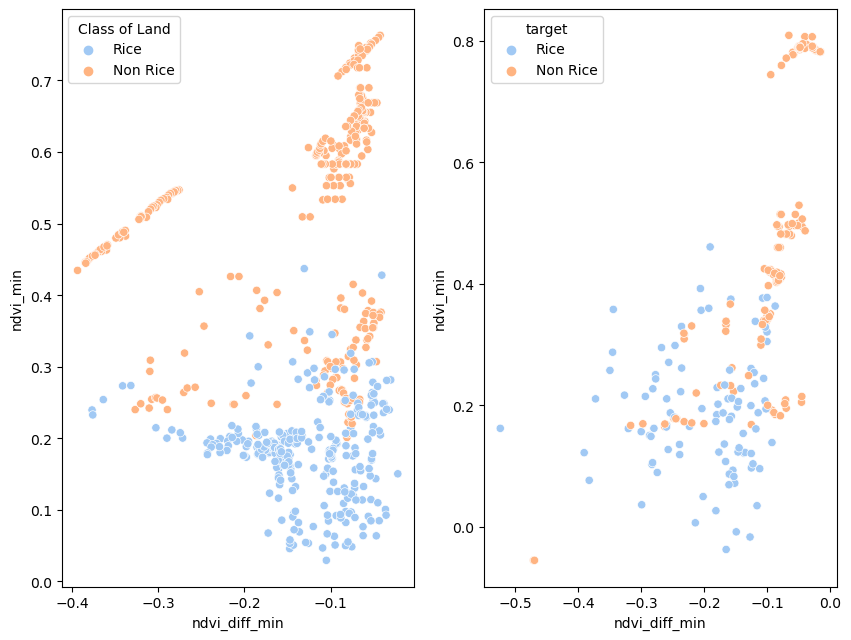

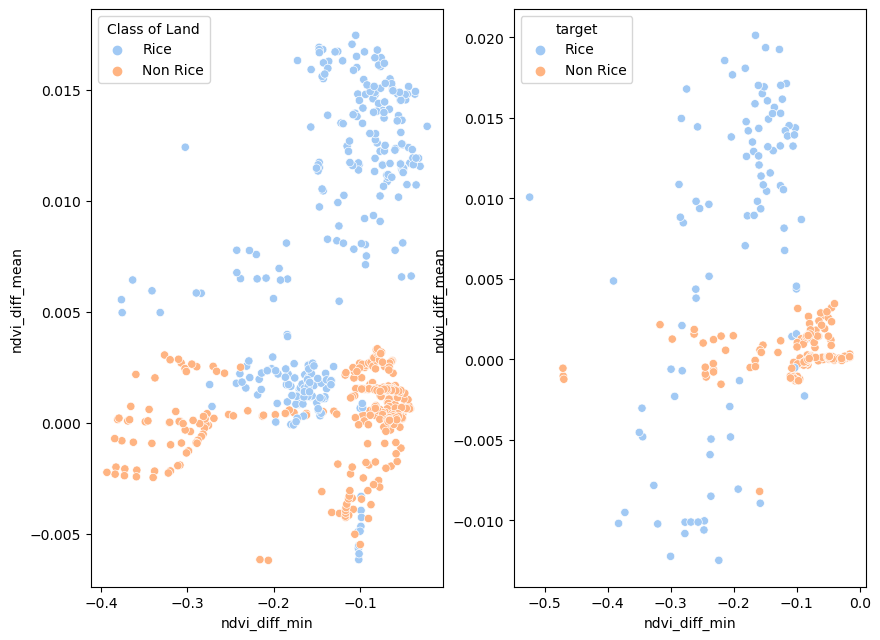

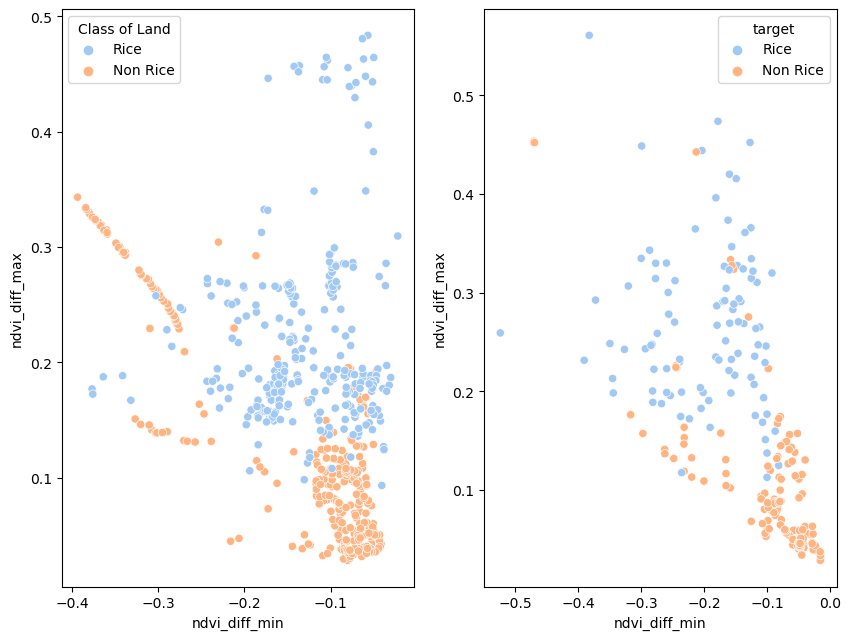

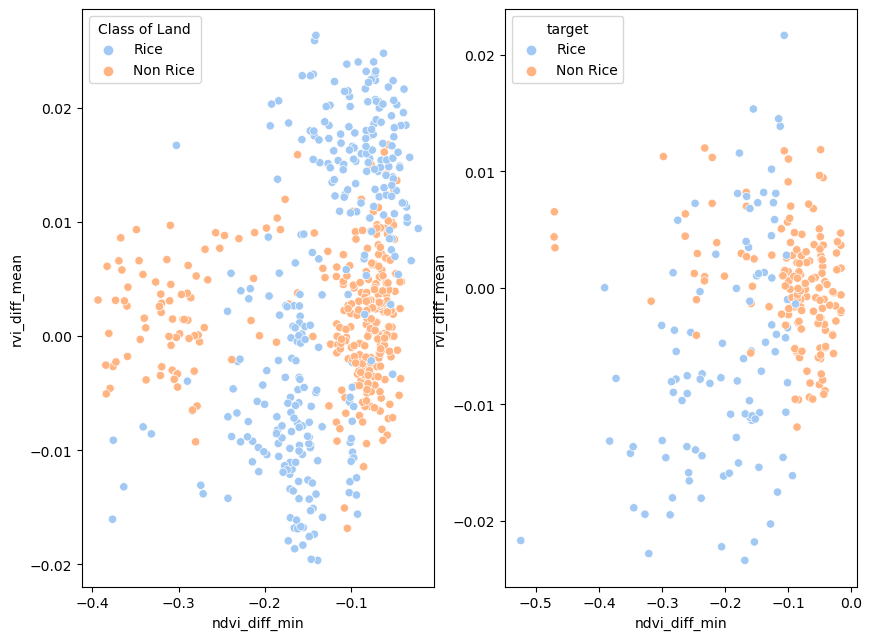

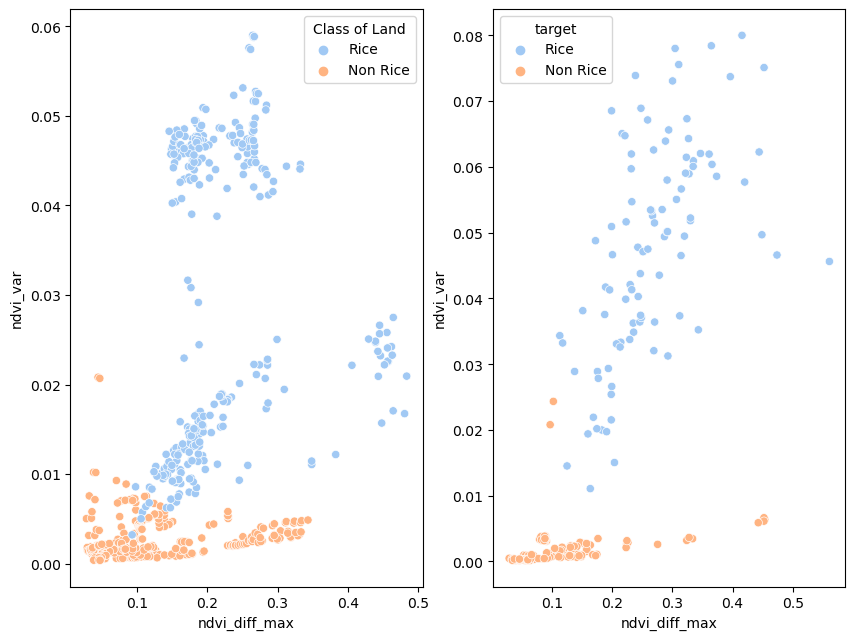

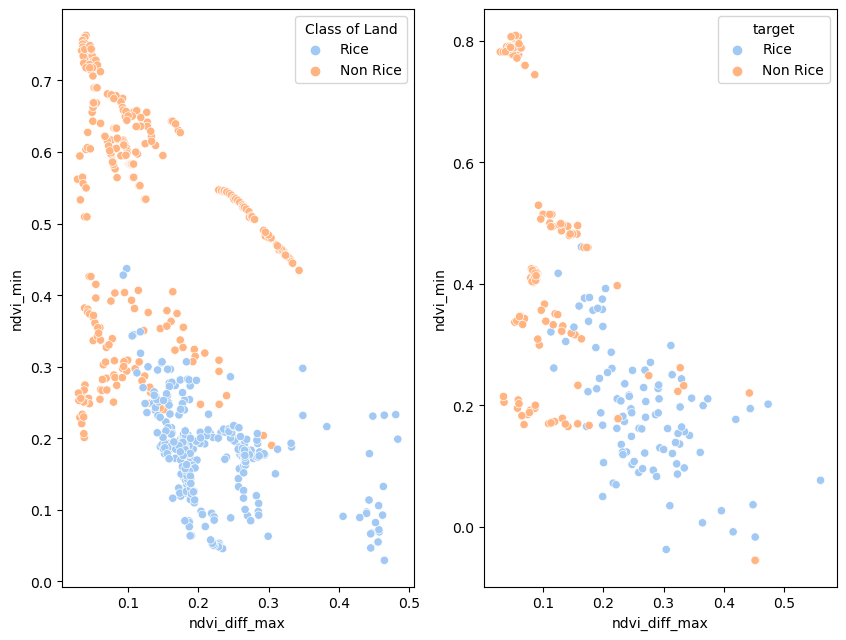

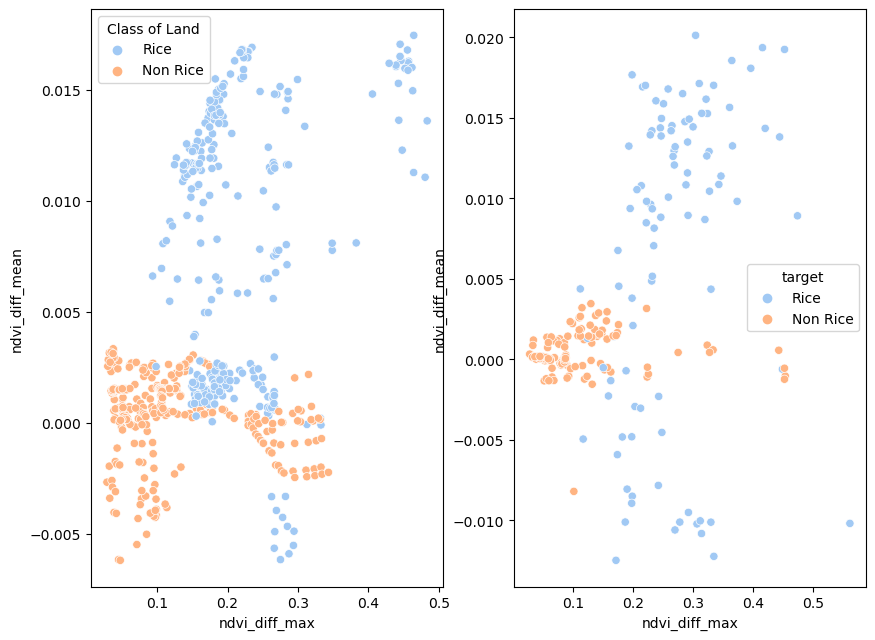

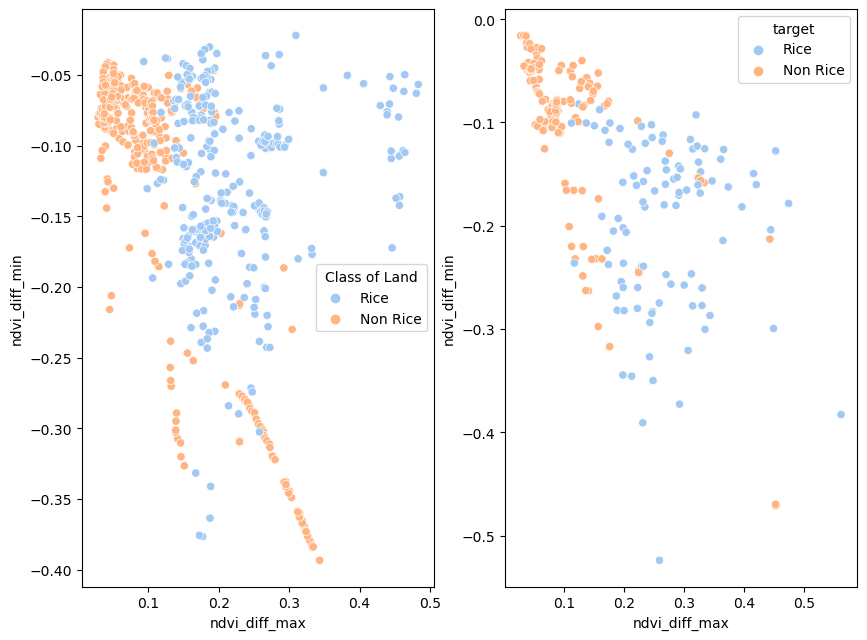

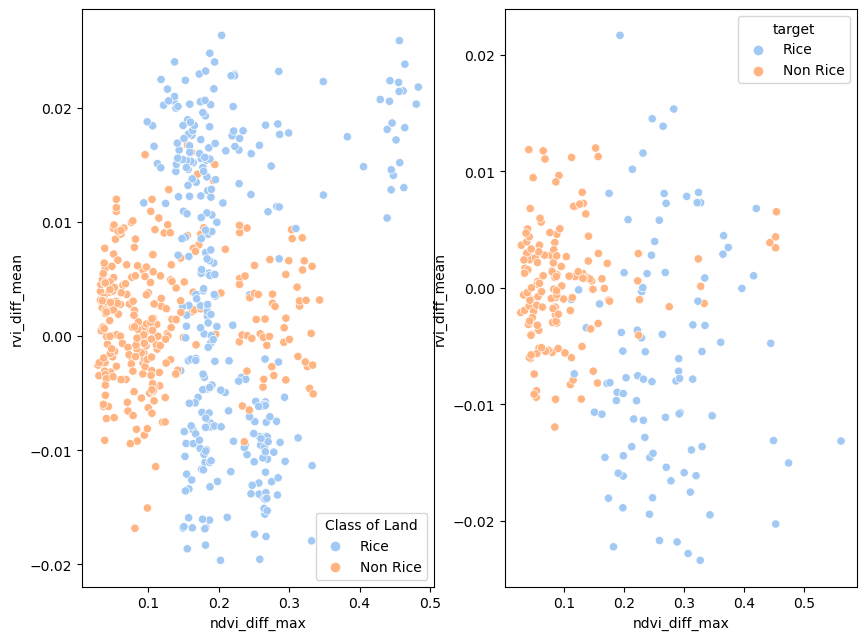

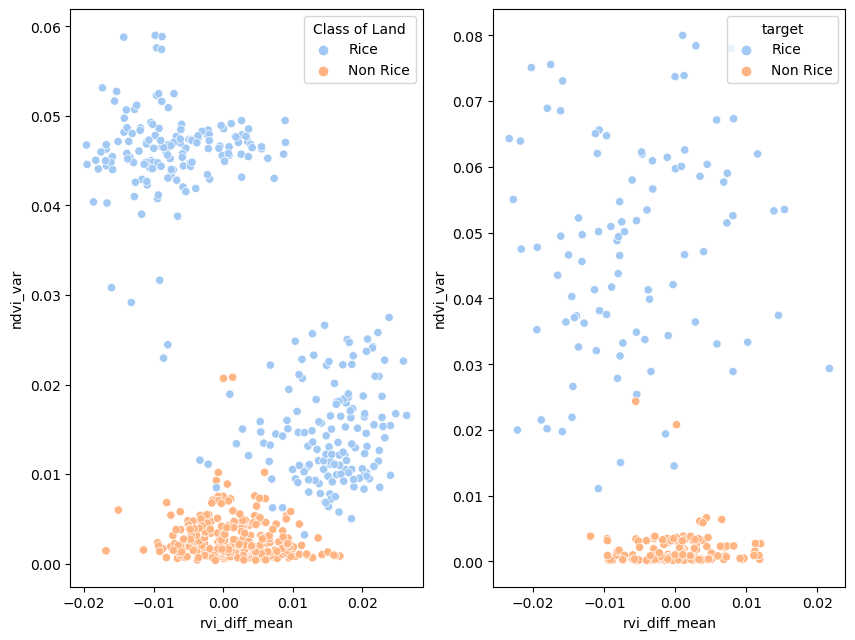

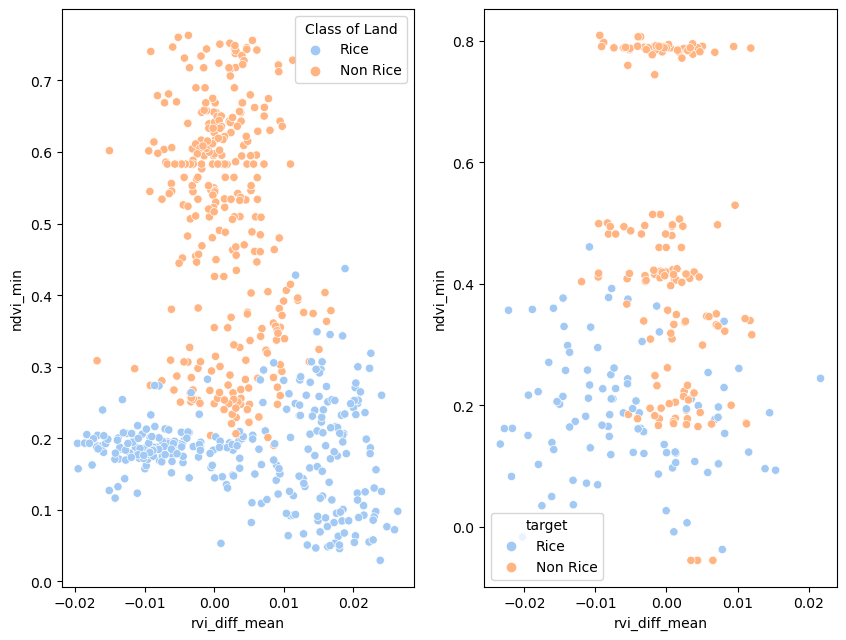

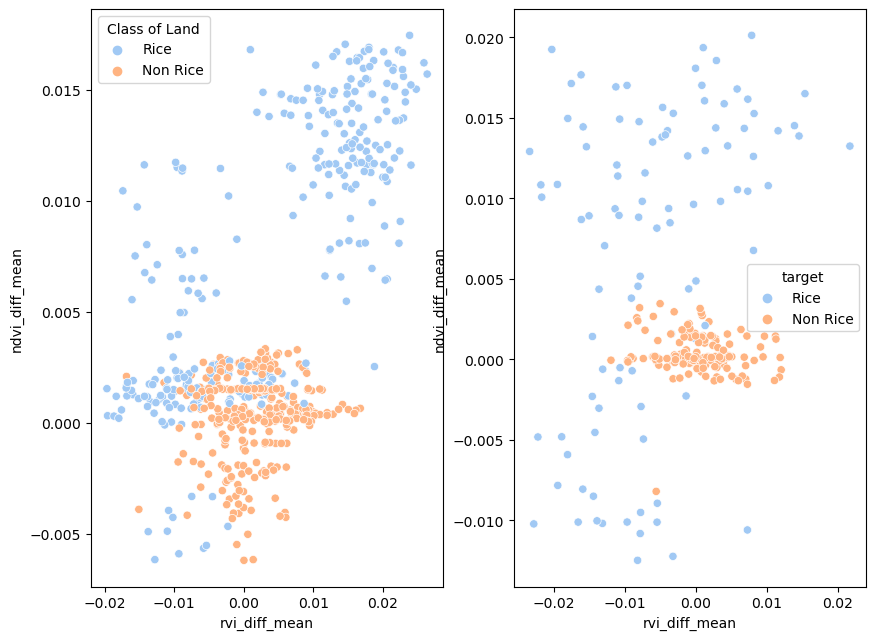

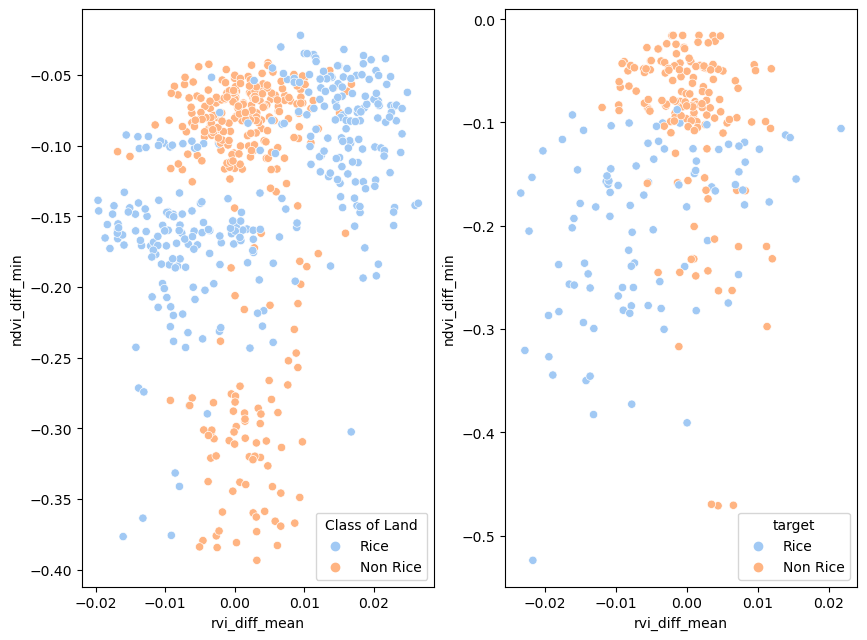

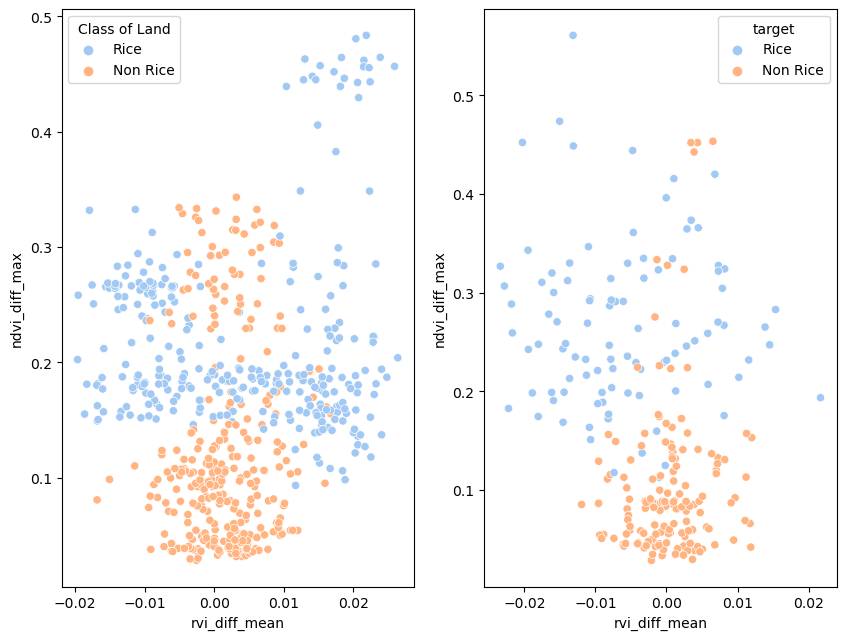

In [325]:
cols = X.columns
for i in range(len(cols)-1):
    for j in range(len(cols)-1):
        if i!=j:
            fig,axes = plt.subplots(nrows = 1,ncols = 2)
            sns.scatterplot(x=cols[i], y=cols[j], data=train, hue=rvi_y, palette='pastel',ax=axes[0]);
            sns.scatterplot(x=cols[i], y=cols[j], data=test,  hue=sub['target'],palette='pastel',ax = axes[1]);

In [326]:
from sklearn.metrics import roc_auc_score
y_pred_train = best_model.predict(X)
roc_auc_score(y,y_pred_train)

0.9983333333333333

In [327]:
round(249/250,2)

1.0